<a href="https://colab.research.google.com/github/nasim-fani/AI-CSP/blob/main/6220project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Python Modules**

In [540]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12,8)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

from scipy.stats import beta
from scipy.stats import f

from itertools import cycle

# Machine Learning Modules
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [541]:
#Bioinformatics data analysis and visualization toolkit
#!pip install bioinfokit

In [542]:
#from bioinfokit.visuz import cluster

## **Upload File**

In [543]:
from google.colab import files
uploaded = files.upload()

In [544]:
#read cvs file into dataframe
df=pd.read_csv('/content/Cancer_Data.csv')
#Cancer Types:
# 1. Benign cancer (B)
# 2. Malignant cancer (M)
# Map diagnosis to 0 and 1
map={'B':0,'M':1}
df['diagnosis']=df['diagnosis'].map(map)
df = df.iloc[:,1:11]
df = df.drop(['smoothness_mean','concavity_mean','compactness_mean','texture_mean'], axis = 1)
df.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concave points_mean,symmetry_mean
0,1,17.99,122.80,1001.0,0.14710,0.2419
1,1,20.57,132.90,1326.0,0.07017,0.1812
2,1,19.69,130.00,1203.0,0.12790,0.2069
3,1,11.42,77.58,386.1,0.10520,0.2597
4,1,20.29,135.10,1297.0,0.10430,0.1809


In [545]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   diagnosis            569 non-null    int64  
 1   radius_mean          569 non-null    float64
 2   perimeter_mean       569 non-null    float64
 3   area_mean            569 non-null    float64
 4   concave points_mean  569 non-null    float64
 5   symmetry_mean        569 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


### **Classes**

In [546]:
y = df['diagnosis']
target = df['diagnosis'].to_numpy()


In [547]:
Y = df['diagnosis']

### **Features**

Data Matrix

In [548]:
X = df.drop(['diagnosis'],axis=1)
X.head(10)

,radius_mean,perimeter_mean,area_mean,concave points_mean,symmetry_mean
0,17.99,122.80,1001.0,0.14710,0.2419
1,20.57,132.90,1326.0,0.07017,0.1812
2,19.69,130.00,1203.0,0.12790,0.2069
3,11.42,77.58,386.1,0.10520,0.2597
4,20.29,135.10,1297.0,0.10430,0.1809
5,12.45,82.57,477.1,0.08089,0.2087
6,18.25,119.60,1040.0,0.07400,0.1794
7,13.71,90.20,577.9,0.05985,0.2196
8,13.00,87.50,519.8,0.09353,0.2350
9,12.46,83.97,475.9,0.08543,0.2030


In [549]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981,11.70000,13.3700,15.7800,28.1100
perimeter_mean,569.0,91.969033,24.298981,43.790,75.17000,86.2400,104.1000,188.5000
area_mean,569.0,654.889104,351.914129,143.500,420.30000,551.1000,782.7000,2501.0000
concave points_mean,569.0,0.048919,0.038803,0.000,0.02031,0.0335,0.0740,0.2012
symmetry_mean,569.0,0.181162,0.027414,0.106,0.16190,0.1792,0.1957,0.3040


Notice that the data is not standardizd. So we need to standarize it.

In [550]:
X_st = StandardScaler().fit_transform(X)
df = pd.DataFrame(X_st)
df.columns = X.columns

In [551]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,-1.373633e-16,1.00088,-2.029648,-0.689385,-0.215082,0.469393,3.971288
perimeter_mean,569.0,-1.248757e-16,1.00088,-1.984504,-0.691956,-0.235980,0.499677,3.976130
area_mean,569.0,-2.185325e-16,1.00088,-1.454443,-0.667195,-0.295187,0.363507,5.250529
concave points_mean,569.0,-4.995028e-17,1.00088,-1.261820,-0.737944,-0.397721,0.646935,3.927930
symmetry_mean,569.0,1.748260e-16,1.00088,-2.744117,-0.703240,-0.071627,0.530779,4.484751


Notice that the data is now standardizd.

**Observations and variables**

In [552]:
observations = list(df.index)
print(observations)
variables = list(df.columns)
print(variables)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

## **Data Visualisation**

### Class Distribution

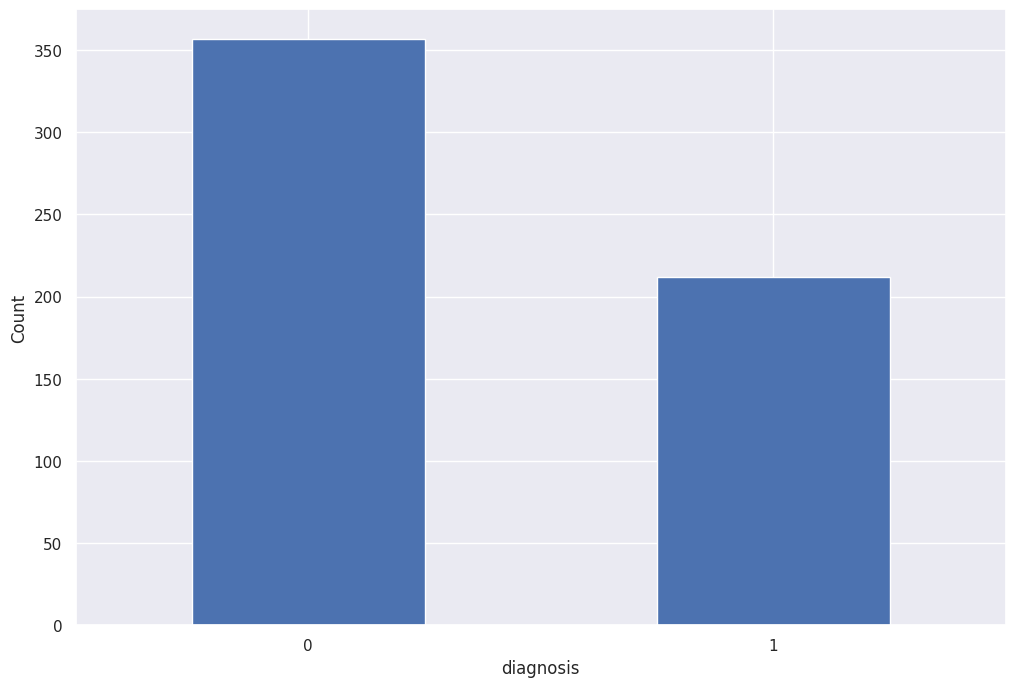

In [553]:
y.value_counts().plot(kind='bar', rot=0)
plt.xlabel('diagnosis')
plt.ylabel('Count')
plt.show()

### Box & Whisker Plots

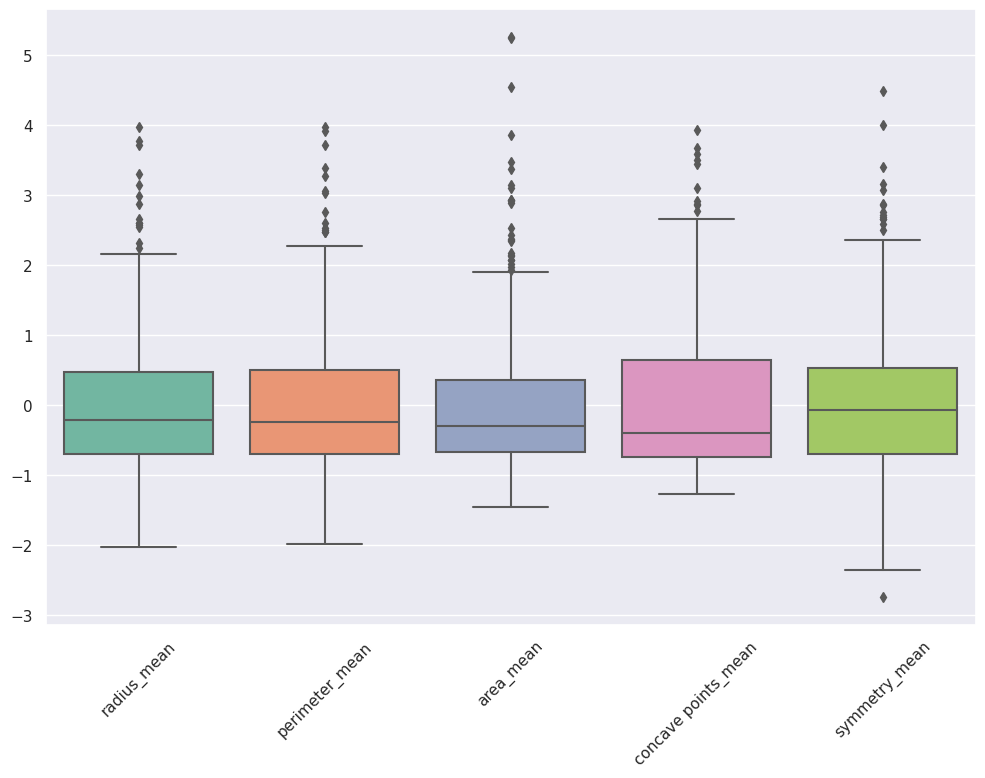

In [554]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


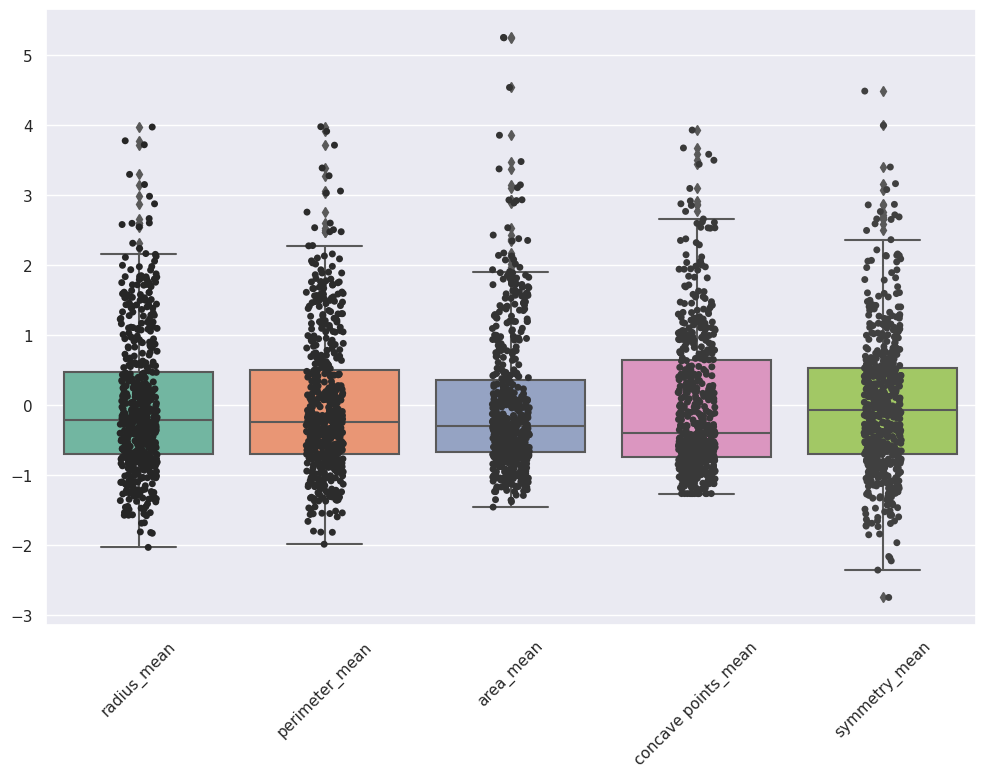

In [555]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

### Five Number Summary

In [556]:
df.describe()

,radius_mean,perimeter_mean,area_mean,concave points_mean,symmetry_mean
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.373633e-16,-1.248757e-16,-2.185325e-16,-4.995028e-17,1.748260e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-1.984504e+00,-1.454443e+00,-1.261820e+00,-2.744117e+00
25%,-6.893853e-01,-6.919555e-01,-6.671955e-01,-7.379438e-01,-7.032397e-01
50%,-2.150816e-01,-2.359800e-01,-2.951869e-01,-3.977212e-01,-7.162650e-02
75%,4.693926e-01,4.996769e-01,3.635073e-01,6.469351e-01,5.307792e-01
max,3.971288e+00,3.976130e+00,5.250529e+00,3.927930e+00,4.484751e+00


### Pair Plot

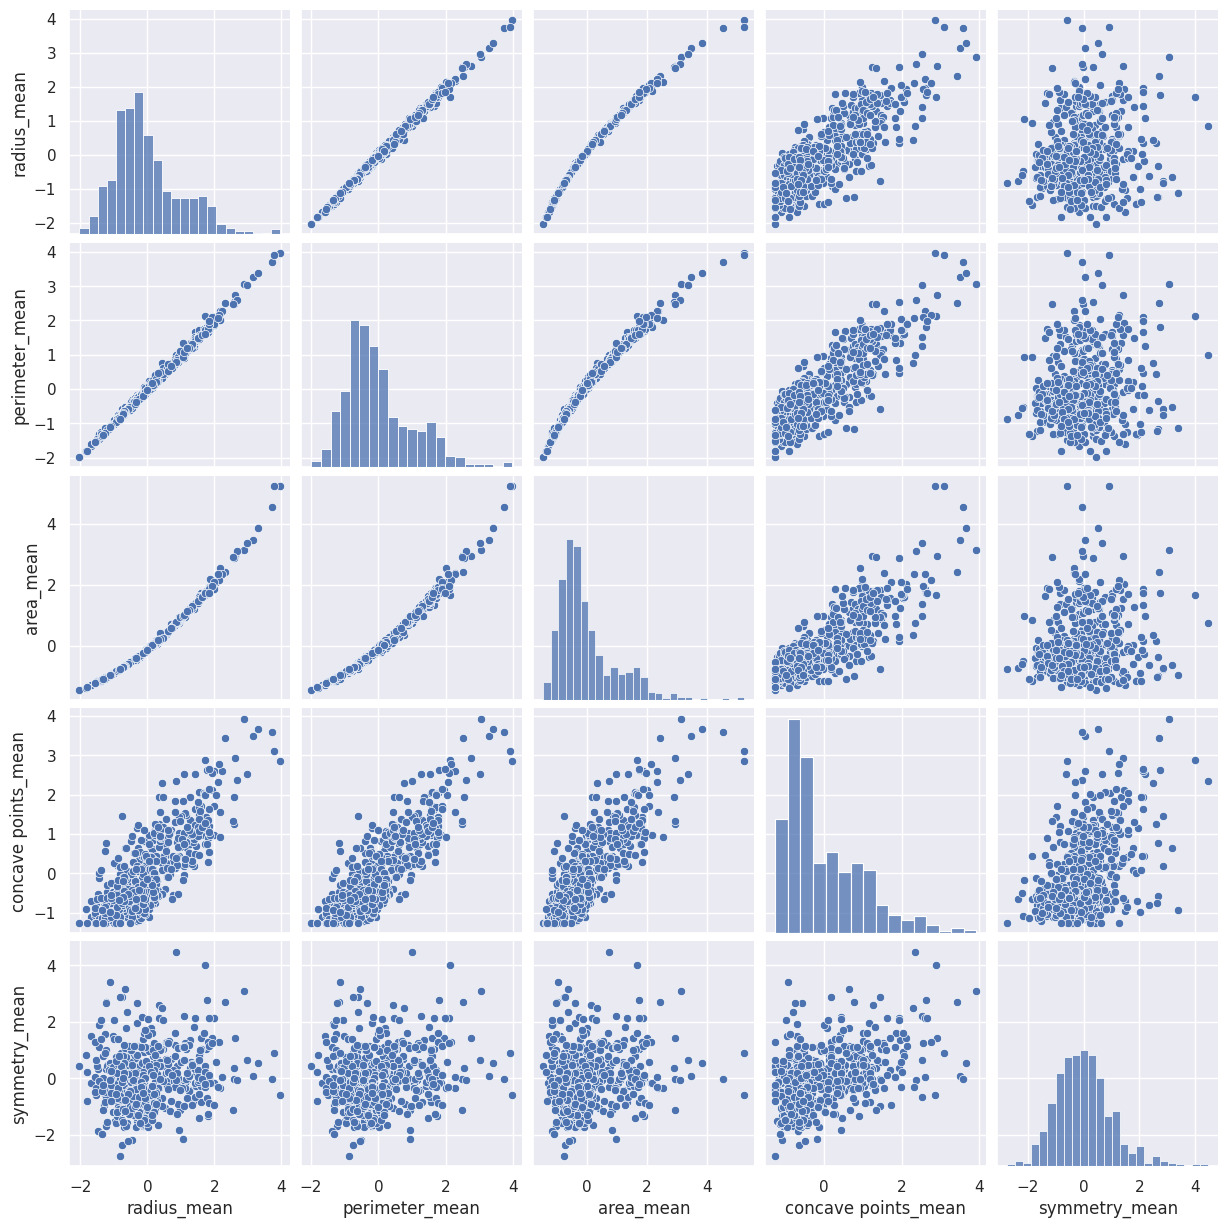

In [557]:
sns.pairplot(df)

## **Covariance**

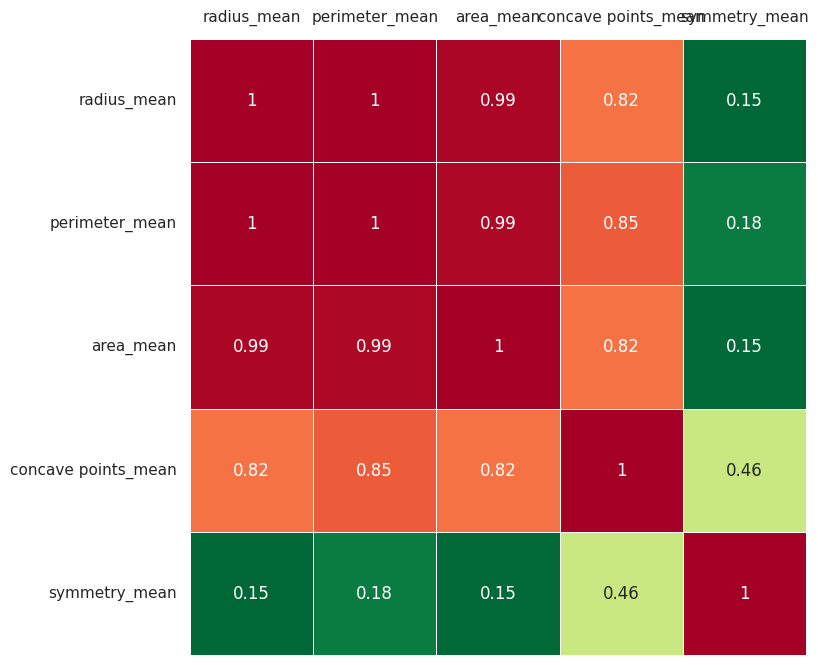

In [558]:
dfc = df - df.mean() #centered data
ax = sns.heatmap(dfc.cov(), cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

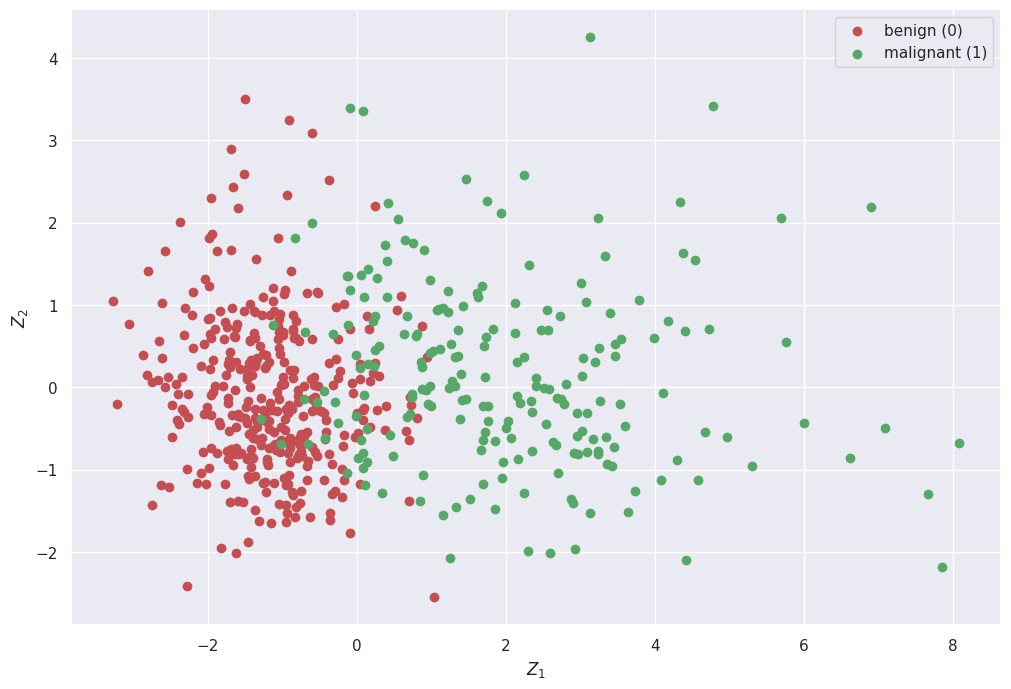

In [559]:
pca = PCA()
pca.fit(df)
Z = pca.fit_transform(df)

# benign cancer (B) and malignant cancer (M)
idx_benign = np.where(y == 0)
idx_malignant = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_benign,0], Z[idx_benign,1], c='r', label='benign (0)')
plt.scatter(Z[idx_malignant,0], Z[idx_malignant,1], c='g', label='malignant (1)')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
#for label, x, y in zip(observations,Z[:, 0],Z[:, 1]):
#    plt.annotate(label, xy=(x, y), xytext=(-2, 2),
#        textcoords='offset points', ha='right', va='bottom')

### **Eigenvectors**

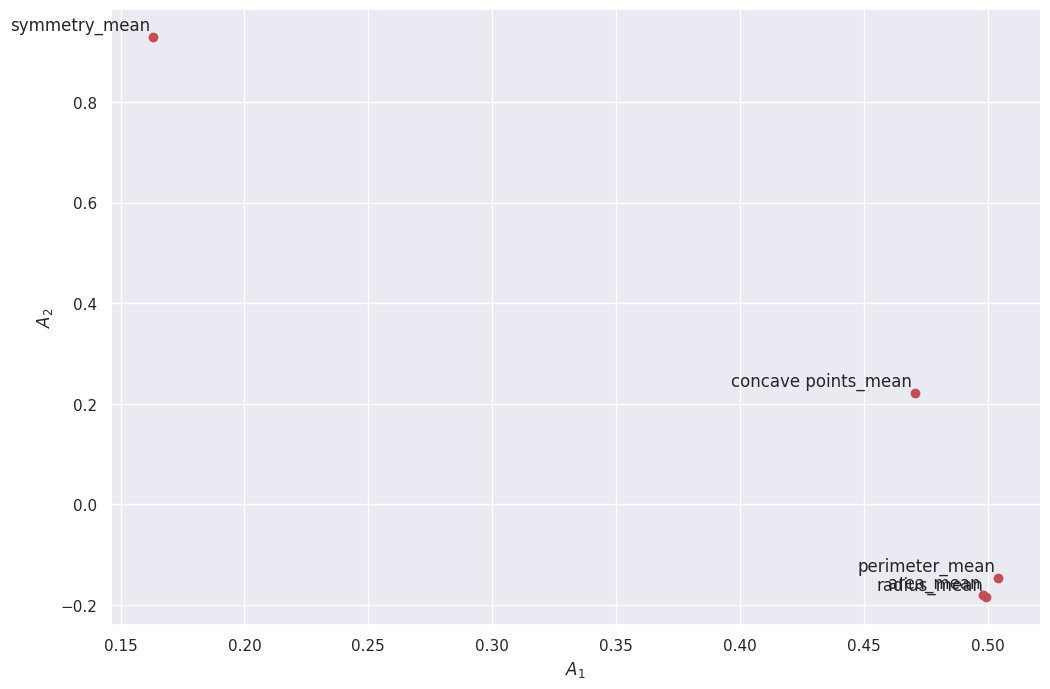

In [560]:
A = pca.components_.T 
#print(f'Eigenvector matrix:\n{A}')

plt.figure()
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


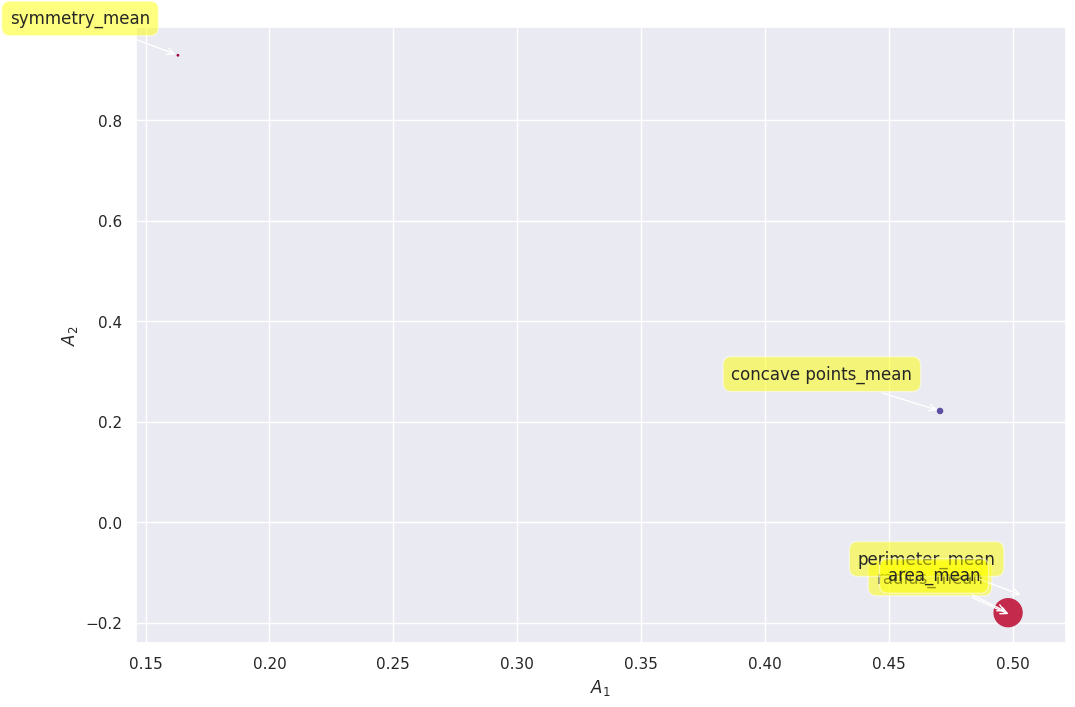

In [561]:
plt.figure()
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

### **Scree plot**

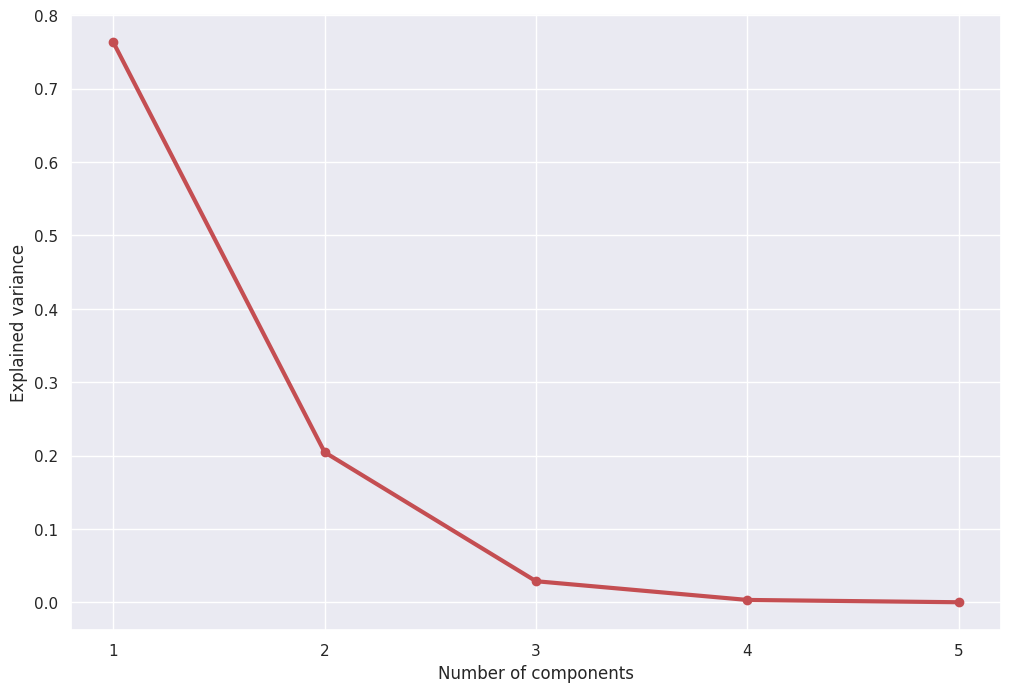

In [562]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()


### **Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

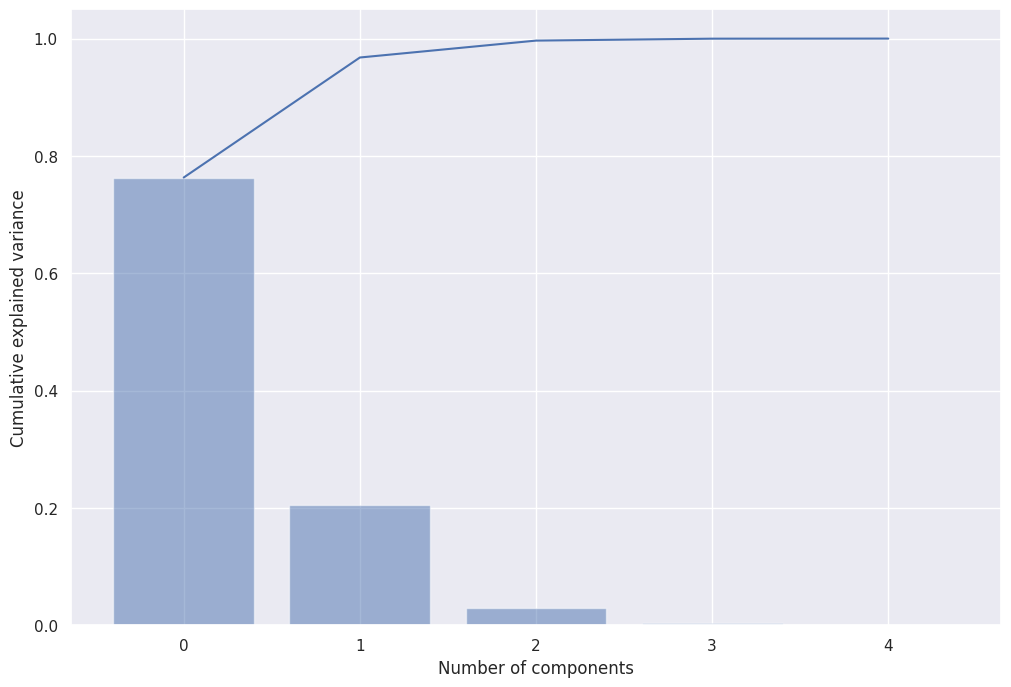

In [563]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Explained Variance per PC**

In [564]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (76.3%)',
 '1': 'PC 2 (20.5%)',
 '2': 'PC 3 (2.9%)',
 '3': 'PC 4 (0.3%)',
 '4': 'PC 5 (0.0%)'}

### **Biplot**

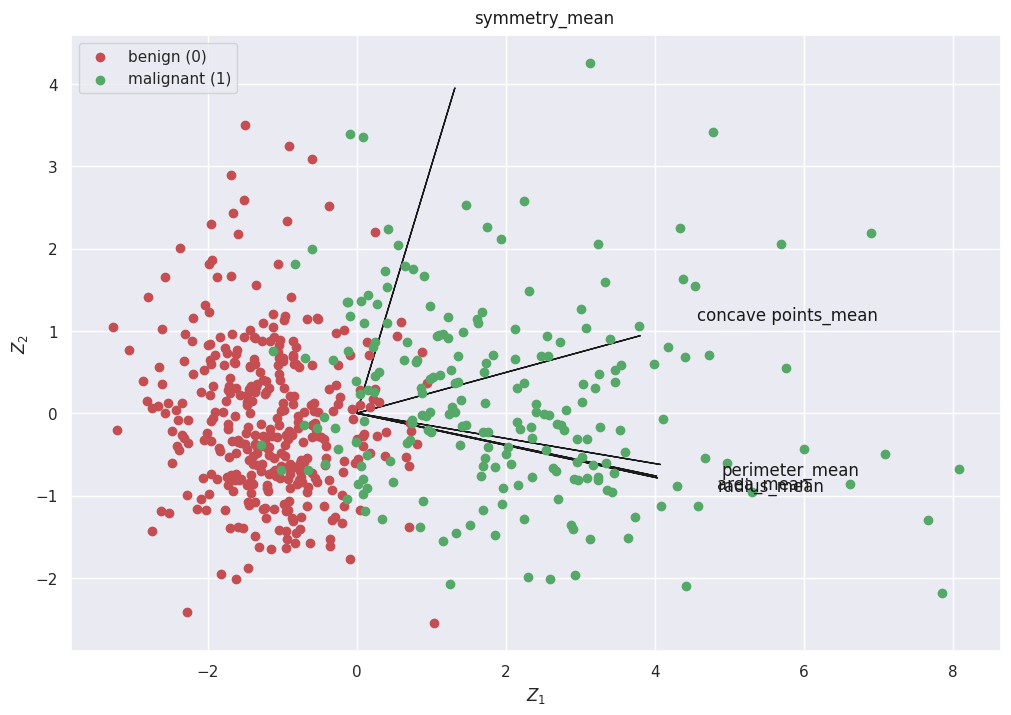

In [565]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_benign,0], Z[idx_benign,1], c='r', label='benign (0)')
plt.scatter(Z[idx_malignant,0], Z[idx_malignant,1], c='g', label='malignant (1)')
plt.legend(loc='upper left')
#for i in range(len(Z1)):
# circles project documents (ie rows from csv) as points onto PC axes
  #plt.scatter(Z1[i], Z2[i], c='g', marker='o')
  #plt.text(Z1[i]*1.2, Z2[i]*1.2, observations[i], color='b')

In [566]:
#cluster.biplot(cscore=Z, loadings=A, labels=X.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2), 
#               var2=round(pca.explained_variance_ratio_[1]*100, 2), colorlist=target)

**Using PCA Librarry**

In [567]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [568]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(df)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [569]:
 # Print the top features. The results show that f1 is best, followed by f2 etc
print(out['topfeat'])

    PC              feature   loading  type
0  PC1       perimeter_mean  0.504309  best
1  PC2        symmetry_mean  0.929002  best
2  PC1          radius_mean  0.499401  weak
3  PC1            area_mean  0.498140  weak
4  PC1  concave points_mean  0.470683  weak


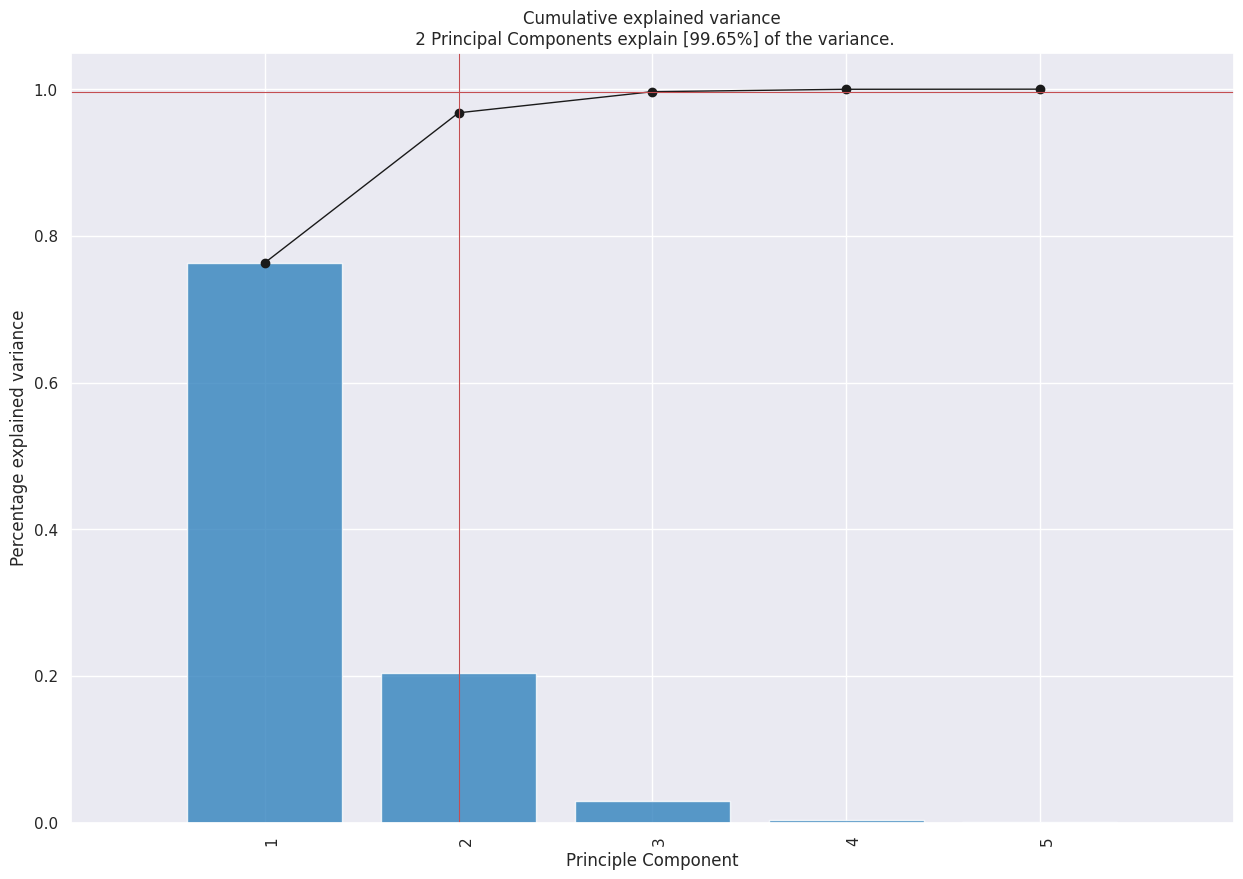

<Figure size 1200x800 with 0 Axes>

In [570]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].


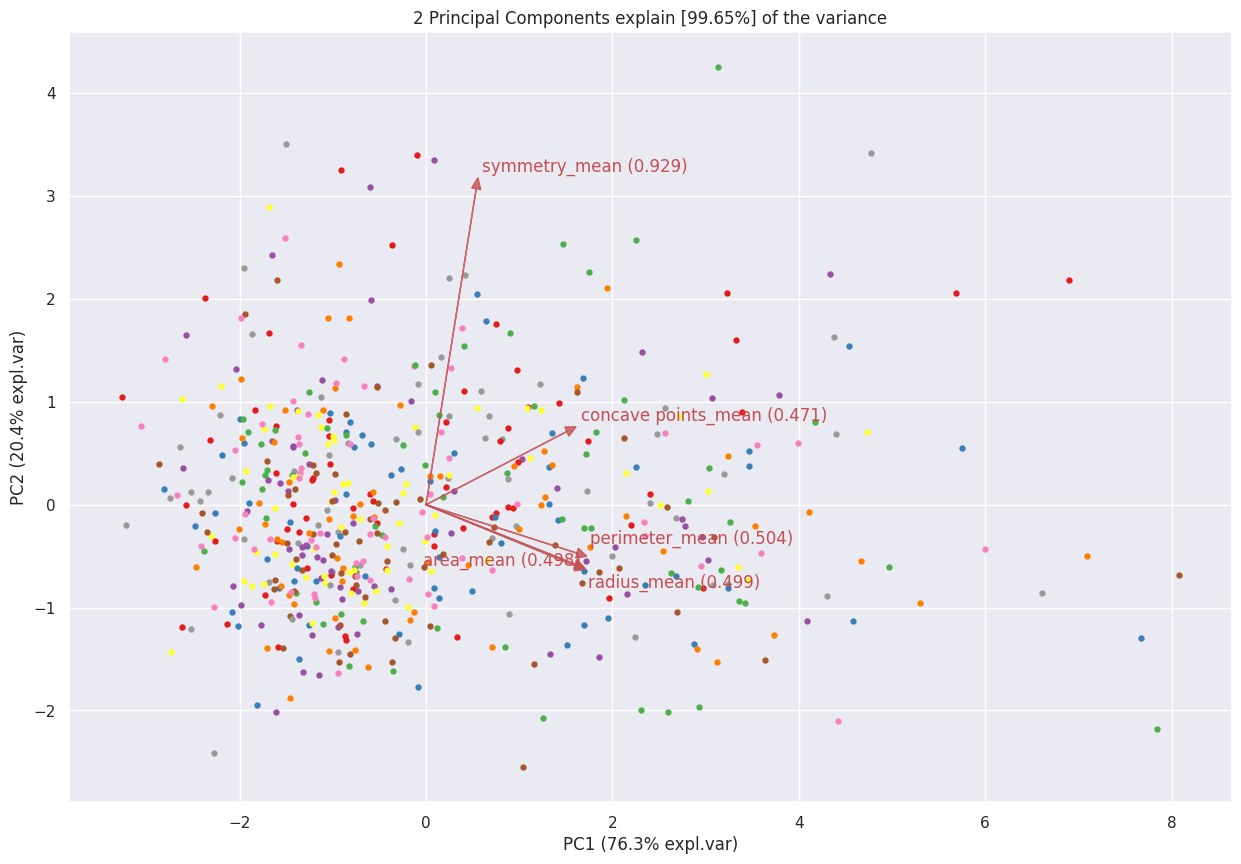

In [571]:
ax = model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [569] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.65%] of the variance'}, xlabel='PC1 (76.3% expl.var)', ylabel='PC2 (20.4% expl.var)'>)

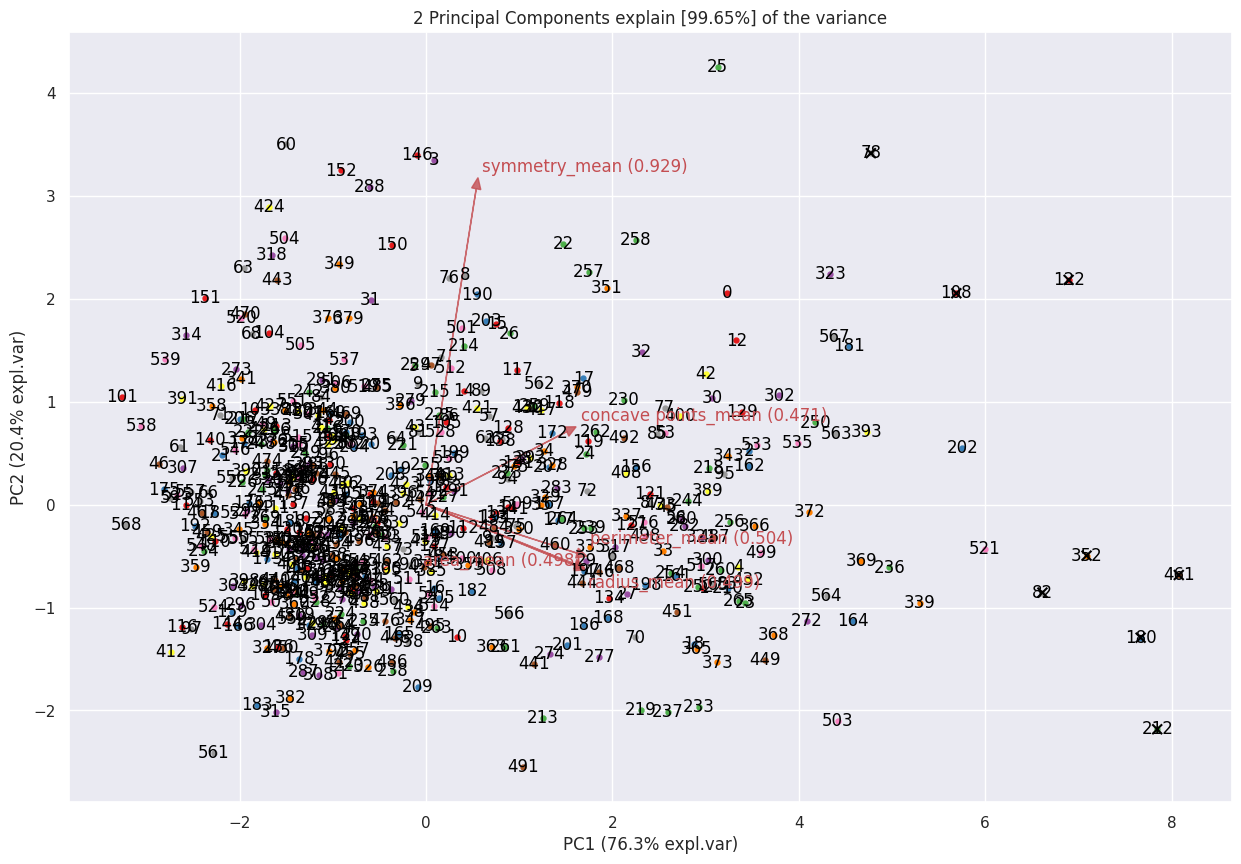

In [572]:
model.biplot(legend=False, hotellingt2=True)

[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [99.65%] of the variance'}, xlabel='PC1 (76.3% expl.var)', ylabel='PC2 (20.4% expl.var)'>)

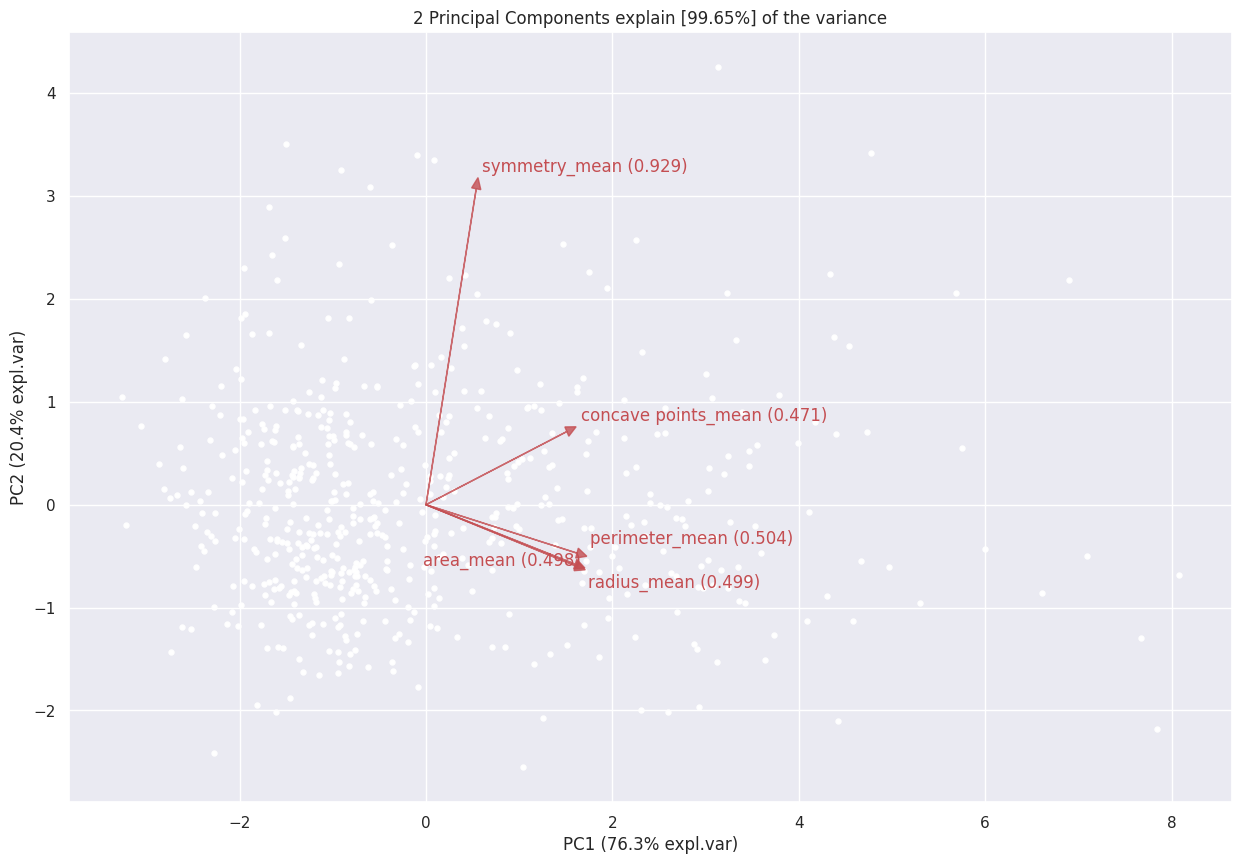

In [573]:
model.biplot(cmap=None, label=False, legend=False)

In [574]:
ax = model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


### **Principal components**

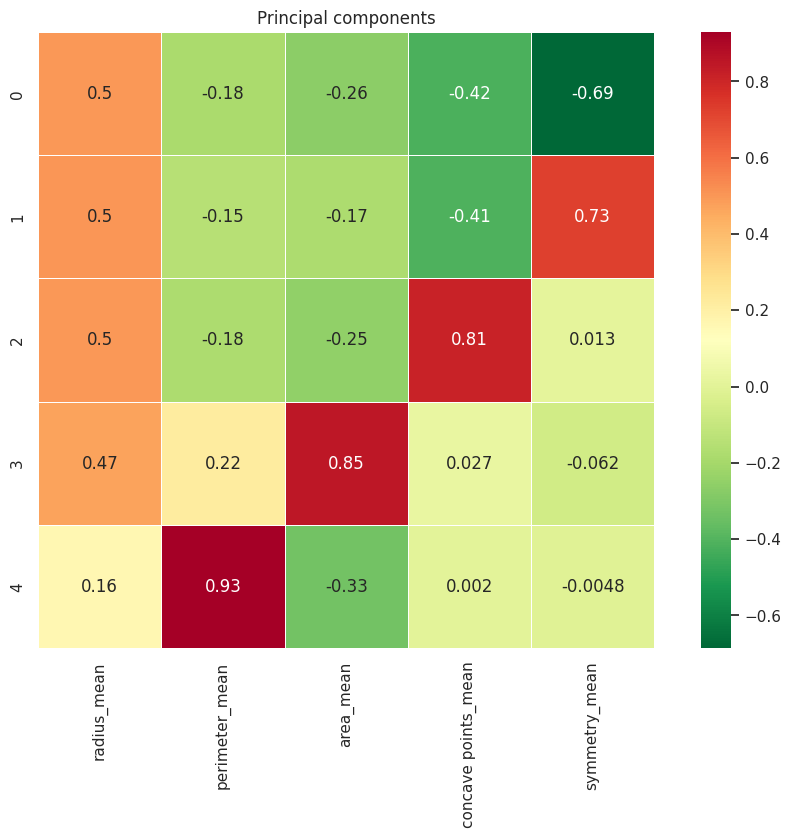

PC1:[0.49940106 0.50430946 0.49814018 0.47068307 0.16304713]
PC2:[-0.18484645 -0.14640438 -0.17977253  0.22143645  0.92900231]


In [575]:
comps = pd.DataFrame(A, columns = variables)
sns.heatmap(comps,cmap='RdYlGn_r', linewidths=0.5, annot=True, 
            cbar=True, square=True)
# ax.tick_params(labelbottom=False,labeltop=True)
plt.xticks(rotation=90)
plt.title('Principal components')
plt.show()

print(f'PC1:{A1}')
print(f'PC2:{A2}')

### **Hotelling's T2 test**

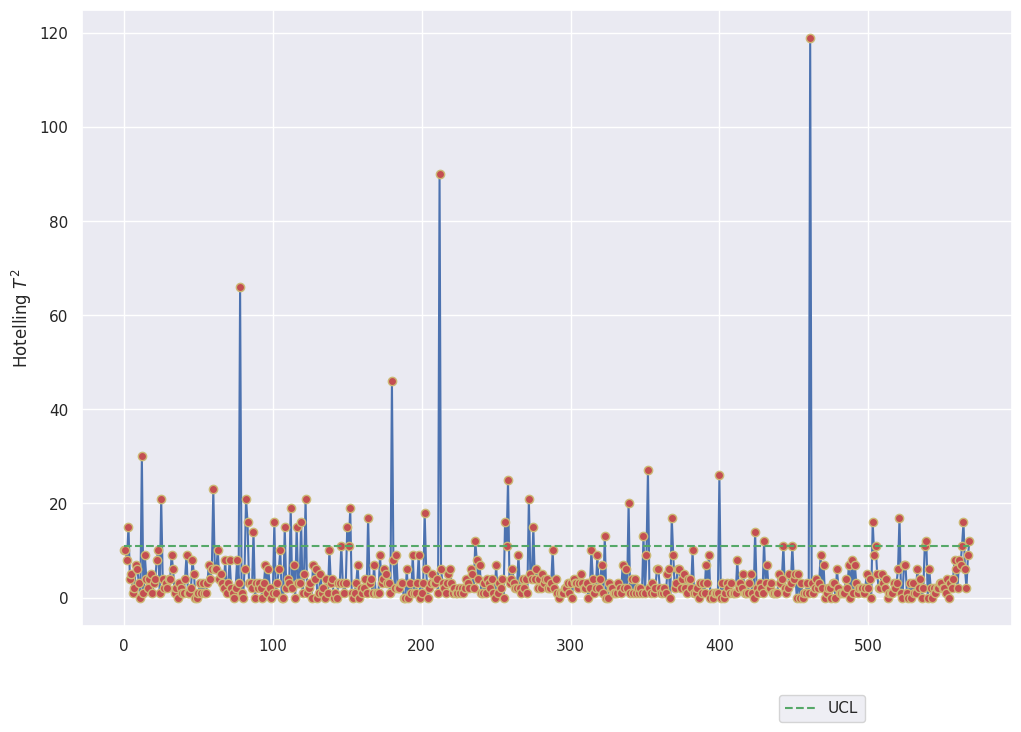

In [576]:
alpha = 0.05
p=Z.shape[1]
n=Z.shape[0]

UCL=((n-1)**2/n )*beta.ppf(1-alpha, p / 2 , (n-p-1)/ 2)
UCL2=p*(n+1)*(n-1)/(n*(n-p) )*f.ppf(1-alpha, p , n-p)
Tsquare=np.array([0]*Z.shape[0])
for i in range(Z.shape[0]):
  Tsquare[i] = np.matmul(np.matmul(np.transpose(Z[i]),np.diag(1/Lambda) ) , Z[i])

fig, ax = plt.subplots()
ax.plot(Tsquare,'-b', marker='o', mec='y',mfc='r' )
ax.plot([UCL for i in range(len(Z1))], "--g", label="UCL")
plt.ylabel('Hotelling $T^2$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

In [577]:
print(np.argwhere(Tsquare>UCL))

[[  3]
 [ 12]
 [ 25]
 [ 60]
 [ 78]
 [ 82]
 [ 83]
 [ 87]
 [101]
 [108]
 [112]
 [116]
 [119]
 [122]
 [150]
 [152]
 [164]
 [180]
 [202]
 [212]
 [236]
 [256]
 [258]
 [272]
 [275]
 [323]
 [339]
 [349]
 [352]
 [368]
 [400]
 [424]
 [430]
 [461]
 [503]
 [521]
 [539]
 [564]
 [568]]


### **Control Charts for Principal Components**

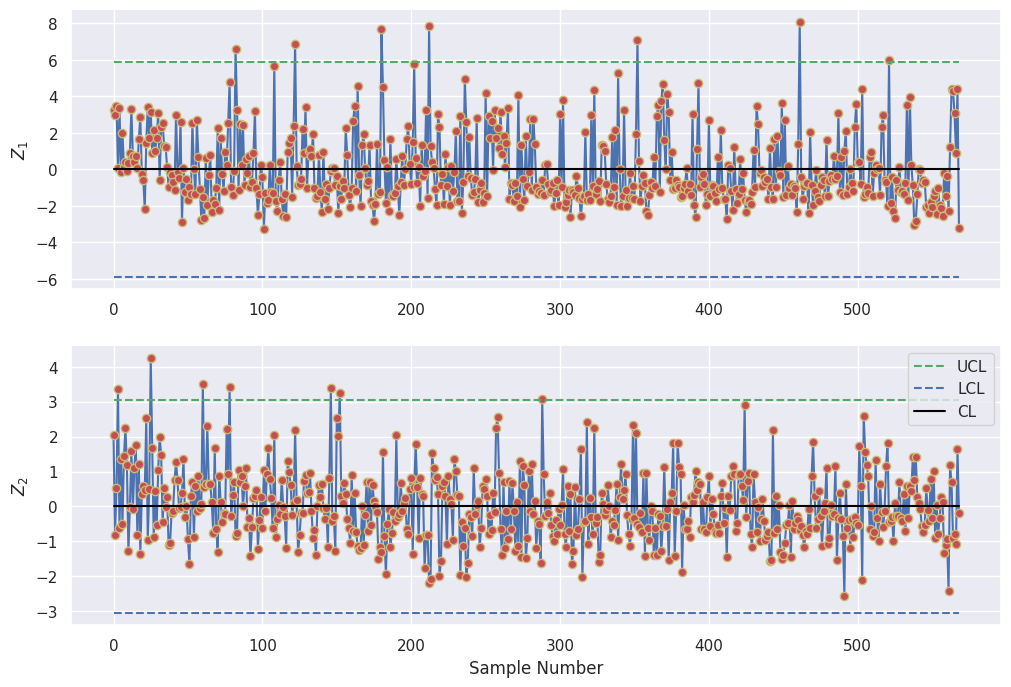

In [578]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(Z1,'-b', marker='o', mec='y',mfc='r')
ax1.plot([3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--g", label="UCL")
ax1.plot([-3*np.sqrt(Lambda[0]) for i in range(len(Z1))], "--b", label='LCL')
ax1.plot([0 for i in range(len(Z1))], "-", color='black',label='CL')
ax1.set_ylabel('$Z_1$')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))

ax2.plot(Z2,'-b', marker='o', mec='y',mfc='r')
ax2.plot([3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--g", label="UCL")
ax2.plot([-3*np.sqrt(Lambda[1]) for i in range(len(Z2))], "--b", label='LCL')
ax2.plot([0 for i in range(len(Z2))], "-", color='black',label='CL')
ax2.set_ylabel('$Z_2$')
ax2.set_xlabel('Sample Number')
legend = ax.legend(shadow=False, ncol=4, bbox_to_anchor=(0.85, -0.1))
plt.legend()

#### Out of Control Points

In [579]:
print(np.argwhere(Z1<-3*np.sqrt(Lambda[0])))
print(np.argwhere(Z1>3*np.sqrt(Lambda[0])))
print(np.argwhere(Z2<-3*np.sqrt(Lambda[1])))
print(np.argwhere(Z2>3*np.sqrt(Lambda[1])))

[]
[[ 82]
 [122]
 [180]
 [212]
 [352]
 [461]
 [521]]
[]
[[  3]
 [ 25]
 [ 60]
 [ 78]
 [146]
 [152]
 [288]]


## **Multi-Class Classification**

In [580]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.3, random_state=0)
print(f'Train Dataset Size: {X_train.shape[0]}')
print(f'Test Dataset Size: {X_test.shape[0]}')

Z_train, Z_test, zy_train, zy_test = train_test_split(Z, Y, test_size=0.3, random_state=0)
Z12_train, Z12_test, z12y_train, z12y_test = train_test_split(Z[:,:2], Y, test_size=0.3, random_state=0)

# Define the evaluation metric
scoring = ['f1_macro']

Train Dataset Size: 398
Test Dataset Size: 171


### Gaussian Naive Bayes (GNB)

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.911     0.944     0.927       108
           1      0.898     0.841     0.869        63

    accuracy                          0.906       171
   macro avg      0.905     0.893     0.898       171
weighted avg      0.906     0.906     0.906       171



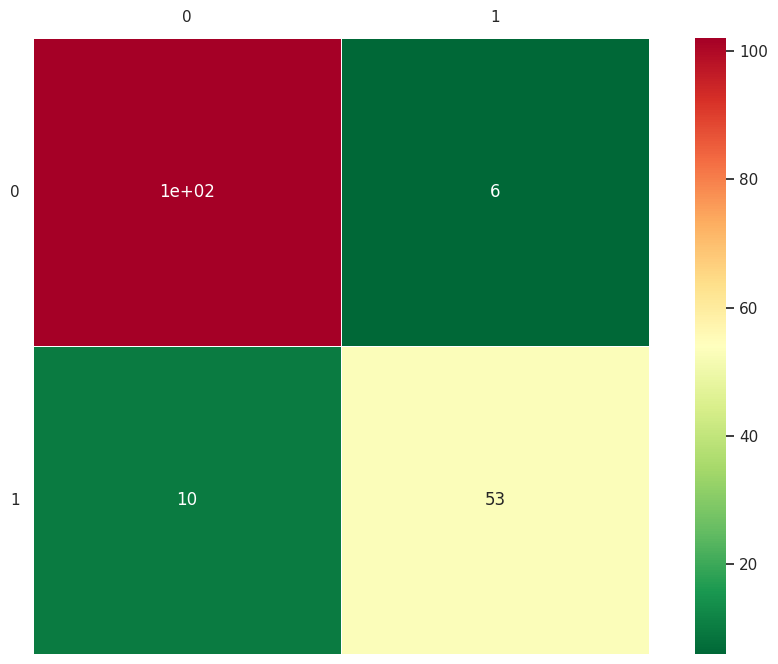

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.902     0.935     0.918       108
           1      0.881     0.825     0.852        63

    accuracy                          0.895       171
   macro avg      0.892     0.880     0.885       171
weighted avg      0.894     0.895     0.894       171



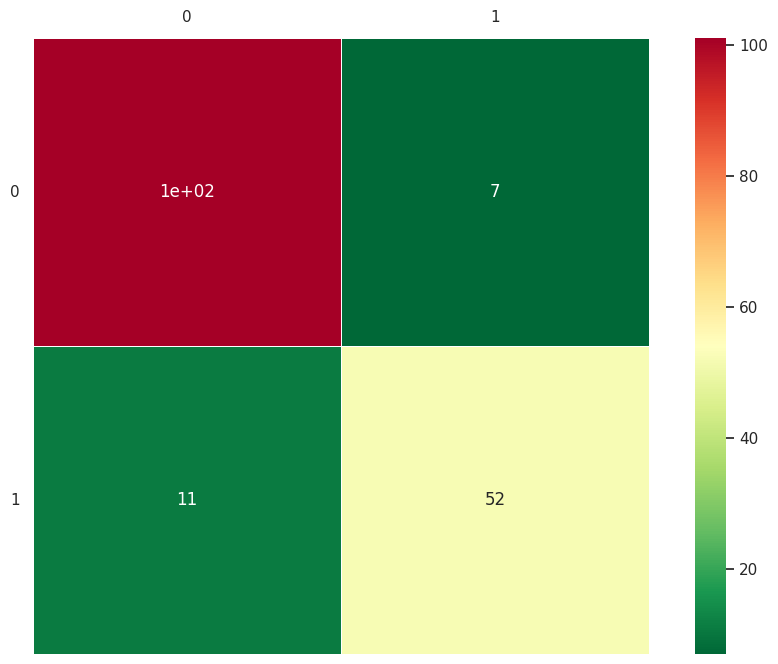

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.910     0.935     0.922       108
           1      0.883     0.841     0.862        63

    accuracy                          0.901       171
   macro avg      0.897     0.888     0.892       171
weighted avg      0.900     0.901     0.900       171



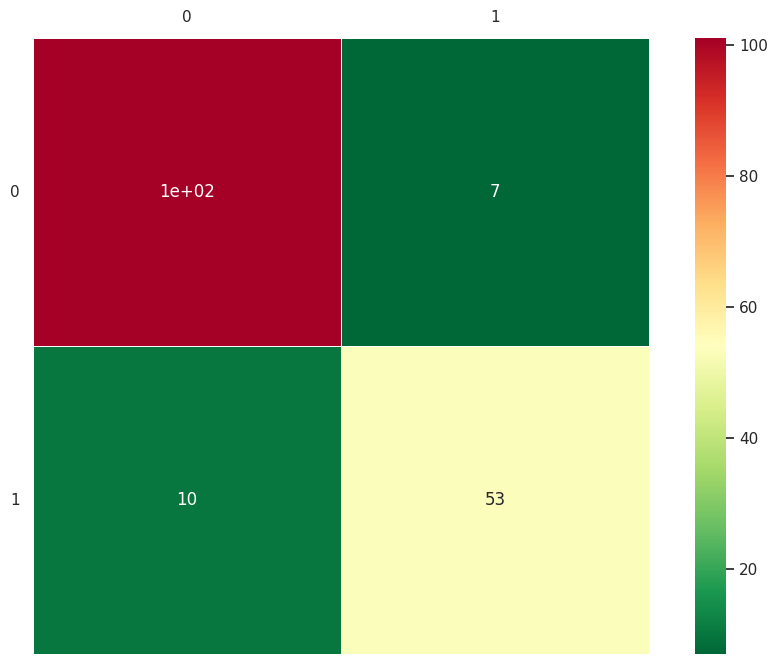

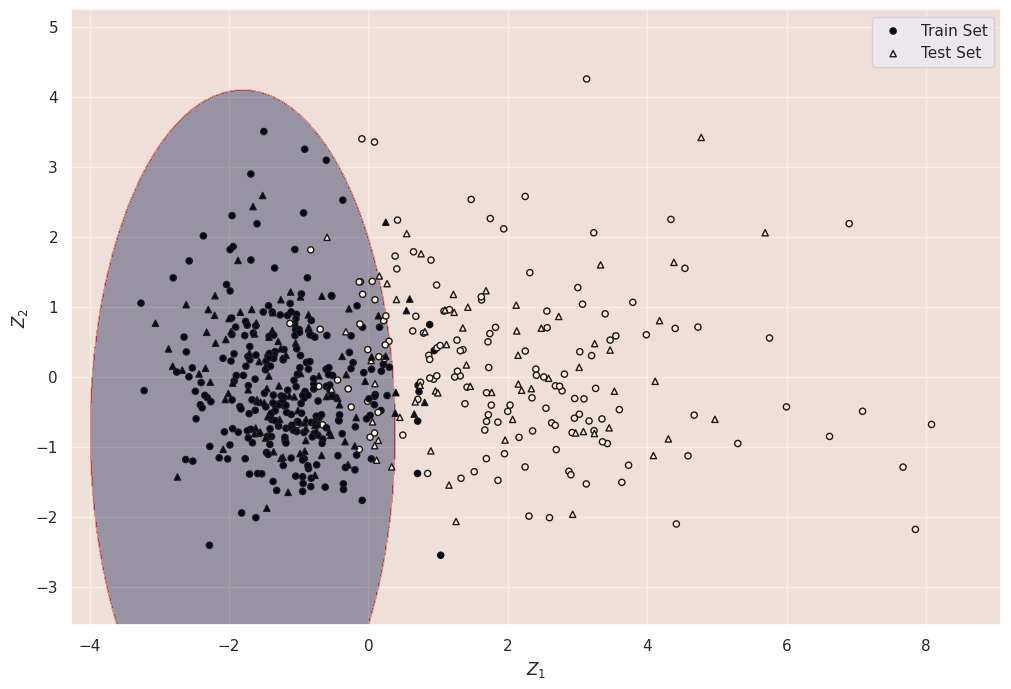

(array([ 10,  13,  14,  20,  35,  40,  42,  60,  73,  91, 108, 113, 116,
       137, 141, 151, 157]),)


In [581]:
gnb = GaussianNB()

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  gnb.fit(Xtr, ytr)
  y_pred = gnb.predict(Xtst)
  gnb_score = gnb.score(Xtst, ytst)
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_gnb = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_gnb, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Naive Bayes Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    print(np.where(ytst != y_pred))

### K Nearest Neighbors (KNN)

Grid Search Results:
k_full_data: {'n_neighbors': 16}
k_Z: {'n_neighbors': 16}
k_Z12: {'n_neighbors': 16}
                                    0         1         2         3         4
knn_full_data fit_time       0.002200  0.003103  0.002139  0.002209  0.002045
knn_Z  fit_time              0.001386  0.001041  0.000962  0.000942  0.001031
knn_Z12 fit_time             0.000928  0.000997  0.001053  0.001009  0.001029
knn_full_data test_f1_macro  0.916143  0.862637  0.920000  0.929021  0.959946
knn_Z  test_f1_macro         0.916143  0.862637  0.920000  0.929021  0.959946
knn_Z12 test_f1_macro        0.901252  0.888190  0.932875  0.929021  0.946909

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.896     0.954     0.924       108
           1      0.911     0.810     0.857        63

    accuracy                          0.901       171
   macro avg      0.903     0.882     0.890       171
weighted avg      0.901     0.901

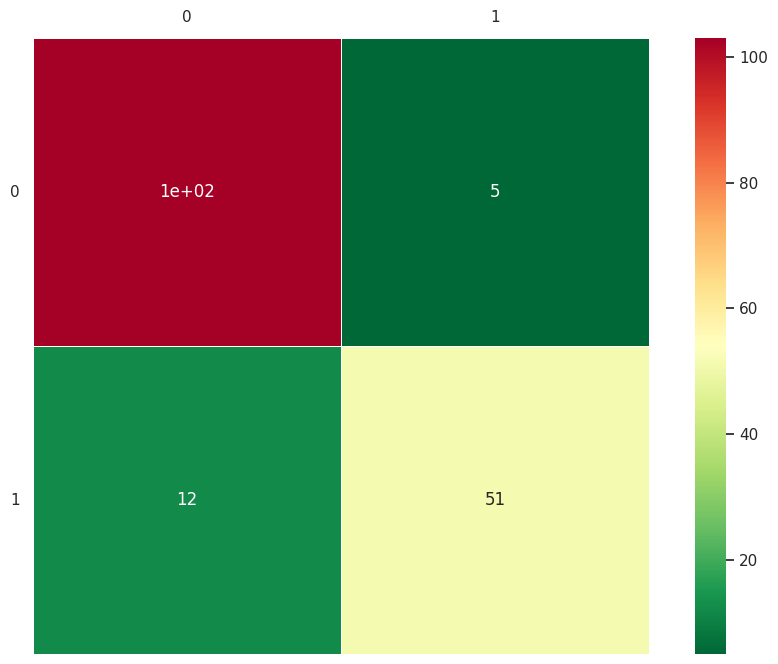

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.896     0.954     0.924       108
           1      0.911     0.810     0.857        63

    accuracy                          0.901       171
   macro avg      0.903     0.882     0.890       171
weighted avg      0.901     0.901     0.899       171



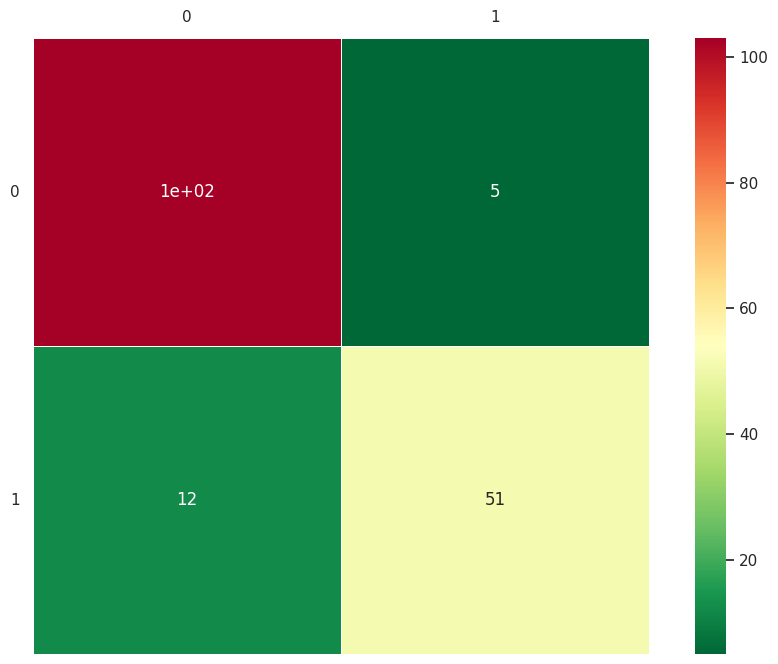

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.895     0.944     0.919       108
           1      0.895     0.810     0.850        63

    accuracy                          0.895       171
   macro avg      0.895     0.877     0.884       171
weighted avg      0.895     0.895     0.894       171



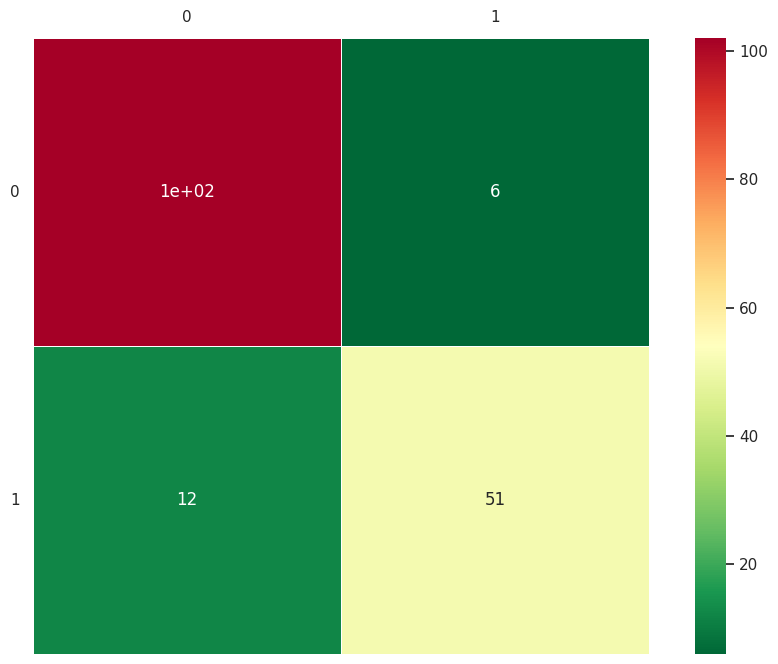

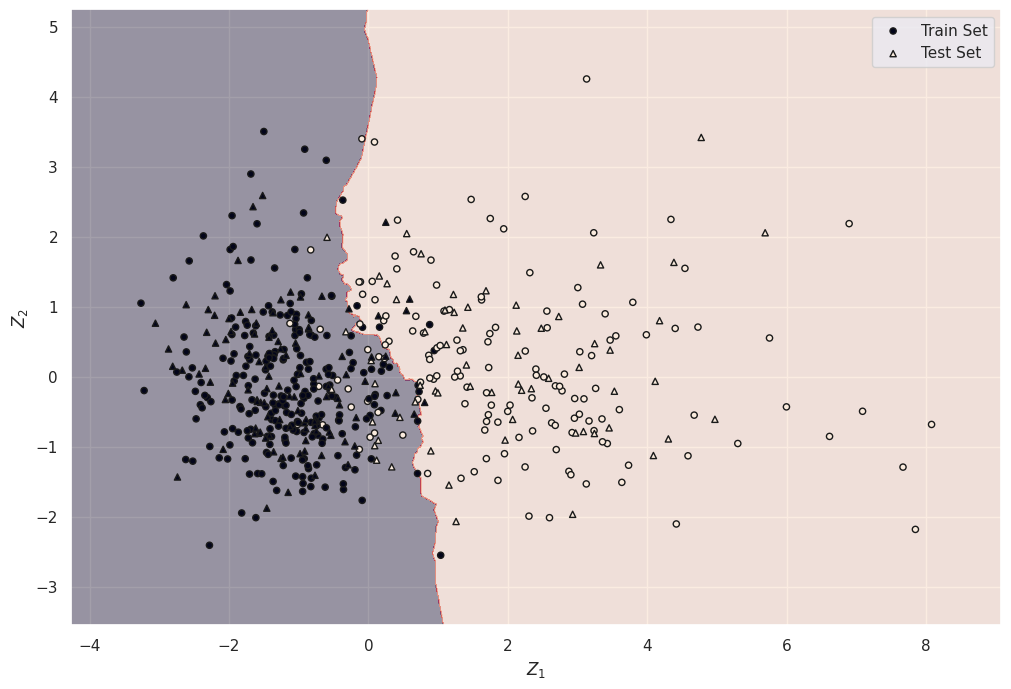

In [582]:
# Hyperparameter grid search for k
param_grid = {'n_neighbors': [2, 4, 8, 16, 32]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Find best k
knn_full_data = grid_search.fit(X_train, y_train)
knn_Z = grid_search.fit(Z_train, zy_train)
knn_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best k
print('Grid Search Results:')
k_full_data = knn_full_data.best_params_
k_Z = knn_Z.best_params_
k_Z12 = knn_Z12.best_params_
print(f'k_full_data: {k_full_data}\nk_Z: {k_Z}\nk_Z12: {k_Z12}')

# Apply best k
knn = KNeighborsClassifier(n_neighbors=k_full_data.get('n_neighbors'))
scores_knn_full_data = cross_validate(knn, X_train, y_train, cv=5, scoring=scoring)
scores_knn_Z = cross_validate(knn, Z_train, zy_train, cv=5, scoring=scoring)
scores_knn_Z12 = cross_validate(knn, Z12_train, z12y_train, cv=5, scoring=scoring)

knn_scores_dict={}
for i in ['fit_time','test_f1_macro']:
  knn_scores_dict["knn_full_data " + i ] = scores_knn_full_data[i]
  knn_scores_dict["knn_Z  " + i ] = scores_knn_Z[i]
  knn_scores_dict["knn_Z12 " + i ] = scores_knn_Z12[i]

knn_scores_data = pd.DataFrame(knn_scores_dict).T
#knn_scores_data['avgs'] = knn_scores_data.mean(axis=1)
print(f'{knn_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  knn.fit(Xtr, ytr)
  y_pred = knn.predict(Xtst)
  knn_score = knn.score(Xtst, ytst)
  #print(f'\nTest Set Accuracy: {knn_score:.3f}')
  
  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_knn = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_knn, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('KNN Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

    # print(np.where(ytst != y_pred))

### Decision Trees (DT)

Grid Search Results:
depth_full_data: {'max_depth': 4}
depth_Z: {'max_depth': 4}
depth_Z12: {'max_depth': 4}
                                   0         1         2         3         4
dt_full_data fit_time       0.002179  0.001967  0.001935  0.001940  0.002278
dt_Z  fit_time              0.001194  0.001146  0.001134  0.001142  0.001223
dt_Z12 fit_time             0.001072  0.000836  0.000880  0.000833  0.000855
dt_full_data test_f1_macro  0.873038  0.904616  0.893333  0.846602  0.921937
dt_Z  test_f1_macro         0.875325  0.890110  0.842001  0.892517  0.933243
dt_Z12 test_f1_macro        0.930736  0.891819  0.877363  0.889356  0.959946

DATASET: FULL DATA
Classification Report:
              precision    recall  f1-score   support

           0      0.953     0.935     0.944       108
           1      0.892     0.921     0.906        63

    accuracy                          0.930       171
   macro avg      0.923     0.928     0.925       171
weighted avg      0.931     0.930    

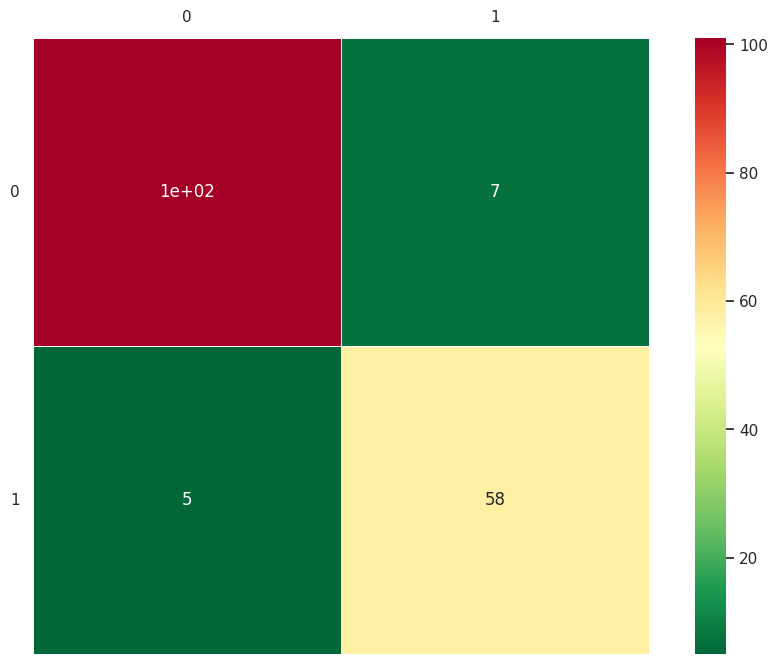

DATASET: Z
Classification Report:
              precision    recall  f1-score   support

           0      0.924     0.898     0.911       108
           1      0.833     0.873     0.853        63

    accuracy                          0.889       171
   macro avg      0.879     0.886     0.882       171
weighted avg      0.890     0.889     0.889       171



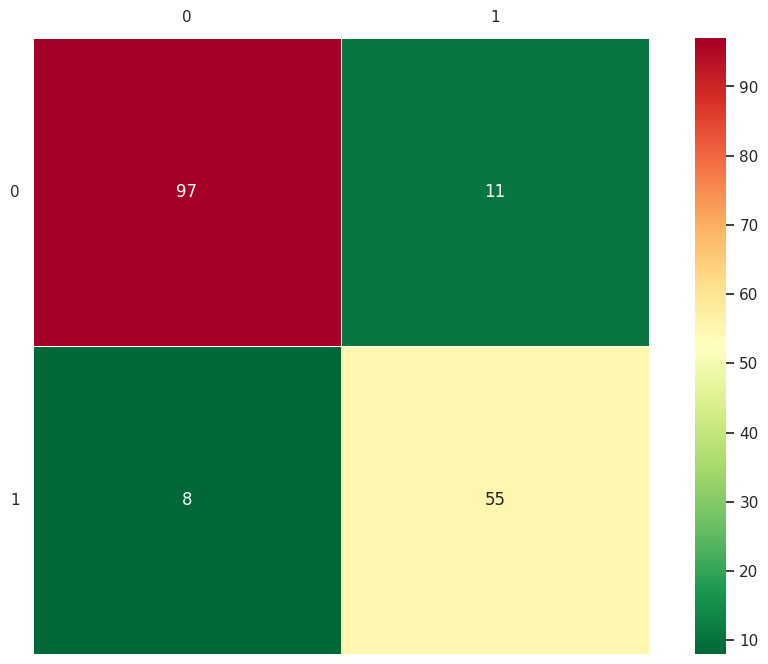

DATASET: Z12
Classification Report:
              precision    recall  f1-score   support

           0      0.901     0.926     0.913       108
           1      0.867     0.825     0.846        63

    accuracy                          0.889       171
   macro avg      0.884     0.876     0.879       171
weighted avg      0.888     0.889     0.888       171



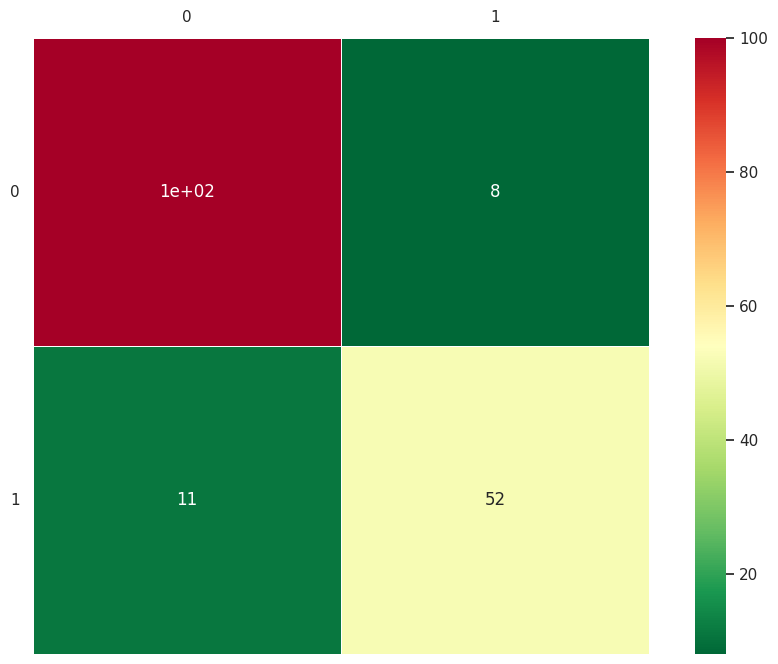

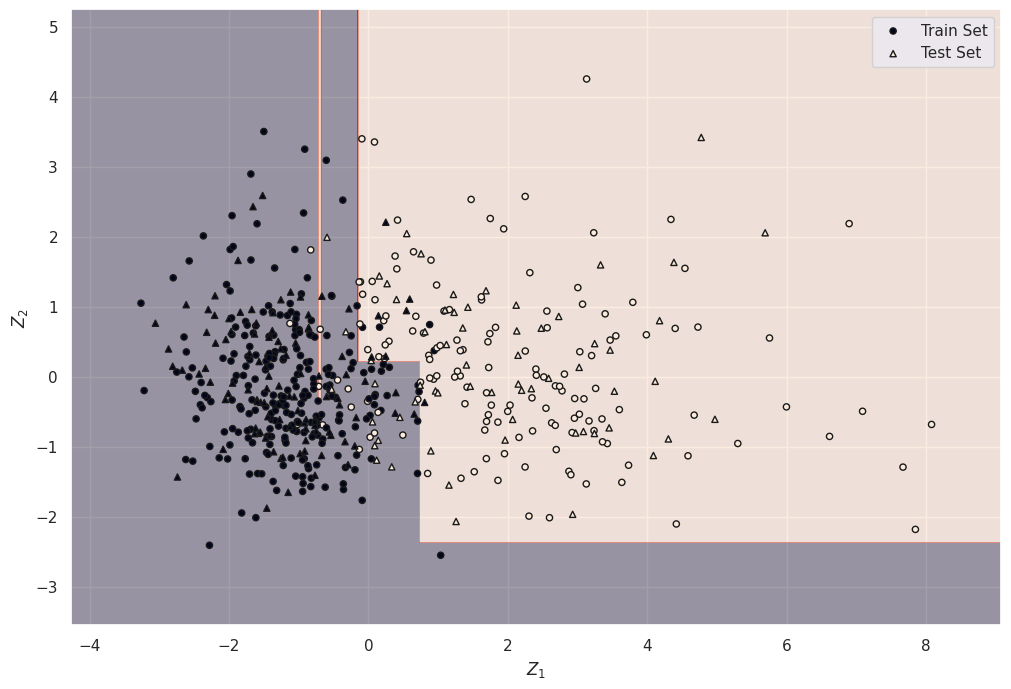

In [583]:
# Hyperparameter search for DT depth
param_grid = {'max_depth': [2, 4, 8, 16, 32, 64]}
dt = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(dt, param_grid, cv=5)

# Find best depth
dt_full_data = grid_search.fit(X_train, y_train)
dt_Z = grid_search.fit(Z_train, zy_train)
dt_Z12 = grid_search.fit(Z12_train, z12y_train)

# Get best tree depth
print('Grid Search Results:')
depth_full_data = dt_full_data.best_params_
depth_Z = dt_Z.best_params_
depth_Z12 = dt_Z12.best_params_
print(f'depth_full_data: {depth_full_data}\ndepth_Z: {depth_Z}\ndepth_Z12: {depth_Z12}')

# Apply best k
dt = DecisionTreeClassifier(max_depth=depth_full_data.get('max_depth'))
scores_dt_full_data = cross_validate(dt, X_train, y_train, cv=5, scoring=scoring)
scores_dt_Z = cross_validate(dt, Z_train, zy_train, cv=5, scoring=scoring)
scores_dt_Z12 = cross_validate(dt, Z12_train, z12y_train, cv=5, scoring=scoring)

dt_scores_dict={}
for i in ['fit_time', 'test_f1_macro']:
  dt_scores_dict["dt_full_data " + i ] = scores_dt_full_data[i]
  dt_scores_dict["dt_Z  " + i ] = scores_dt_Z[i]
  dt_scores_dict["dt_Z12 " + i ] = scores_dt_Z12[i]

dt_scores_data = pd.DataFrame(dt_scores_dict).T
#dt_scores_data['avgs'] = dt_scores_data.mean(axis=1)
print(f'{dt_scores_data}\n')

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, Xtr, ytr, Xtst, ytst) in enumerate(datasets):
  # Apply on train-test split
  dt.fit(Xtr, ytr)
  y_pred = dt.predict(Xtst)
  dt_score = dt.score(Xtst, ytst)
  #print(dt_score)

  # Classification Report
  print(f'DATASET: {name}')
  print('Classification Report:')
  print(classification_report(ytst, y_pred, digits=3))

  # Confusion Matrix
  cm_dt = confusion_matrix(y_true=ytst, y_pred=y_pred)
  ax = sns.heatmap(cm_dt, cmap='RdYlGn_r', linewidths=0.5, annot=True, square=True)
  plt.yticks(rotation=0)
  ax.tick_params(labelbottom=False,labeltop=True)
  ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
  #plt.title('Decision Tree Confusion Matrix')
  plt.show()

  #ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py
  if name == 'Z12':
    # Plotting decision regions
    x_min, x_max = Xtr[:, 0].min() - 1, Xtr[:, 0].max() + 1
    y_min, y_max = Xtr[:, 1].min() - 1, Xtr[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr, s=20, edgecolor="k", label='Train Set')
    plt.scatter(Xtst[:, 0], Xtst[:, 1], c=ytst, marker='^', s=20, edgecolor="k", label='Test Set')
    plt.xlabel('$Z_1$')
    plt.ylabel('$Z_2$')
    plt.legend()
    plt.show()

## **ROC Curves**

DATASET: FULL DATA


/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


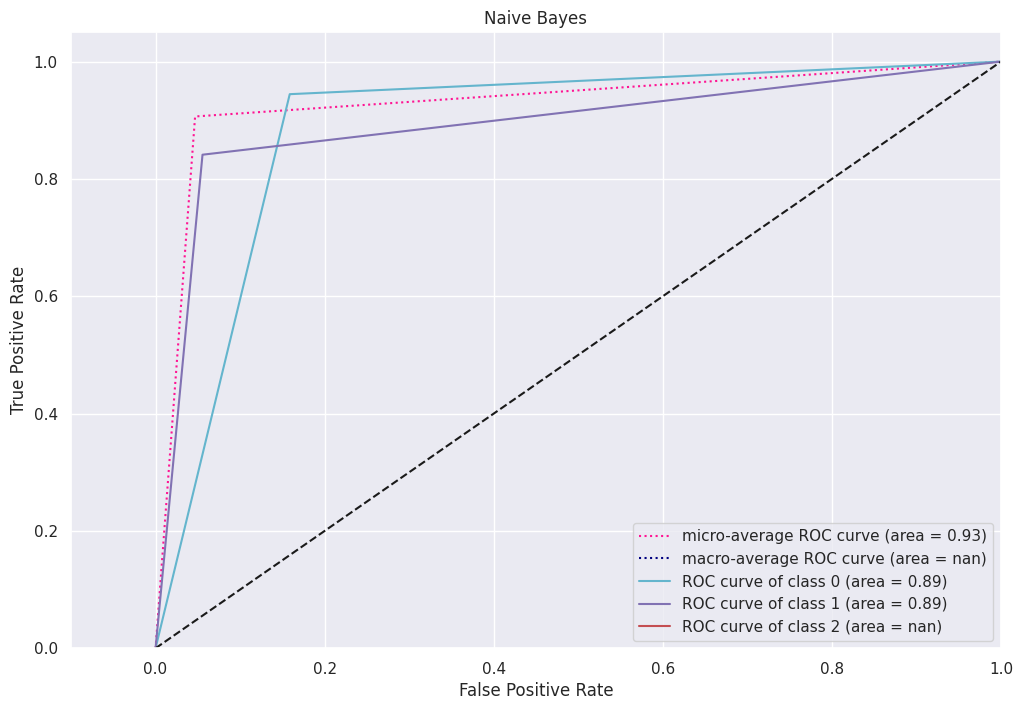

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


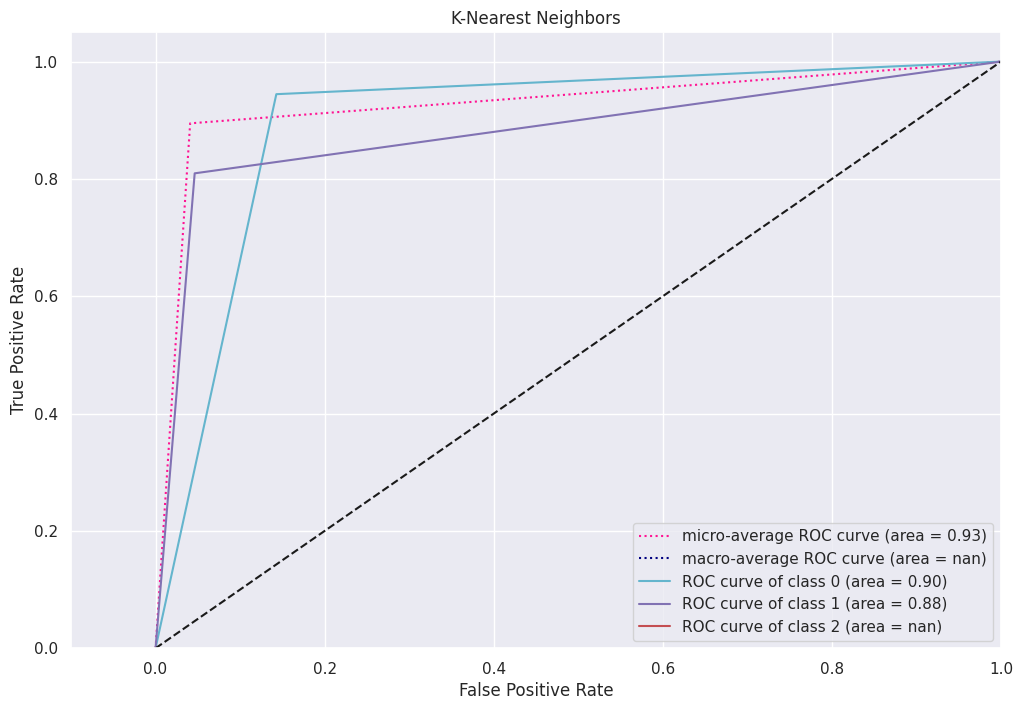

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


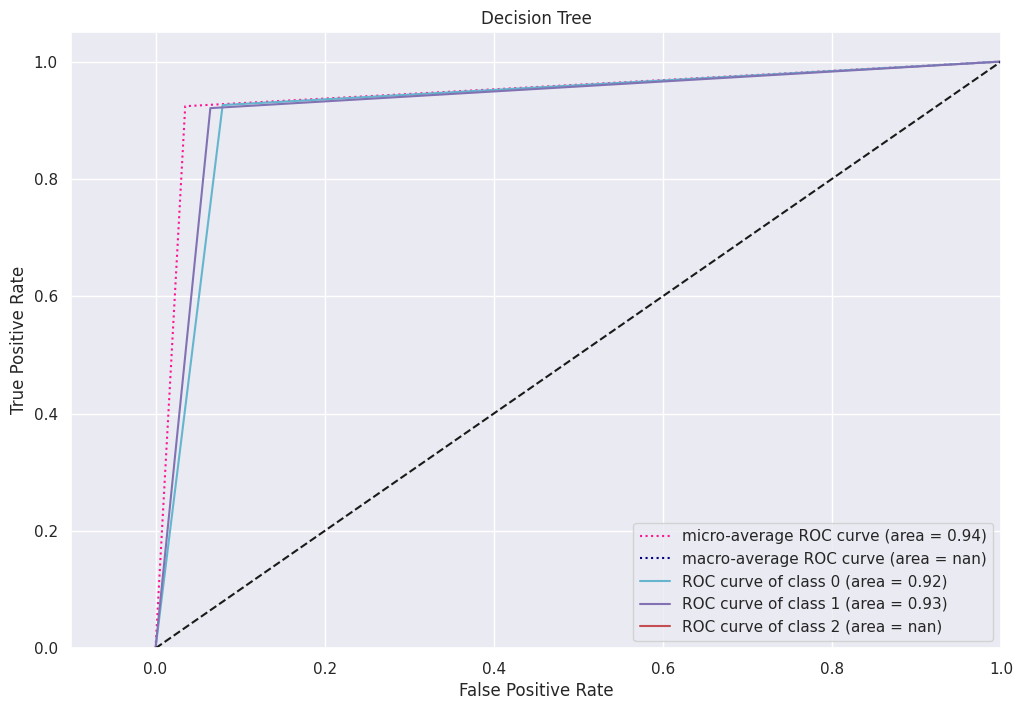

DATASET: Z


/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


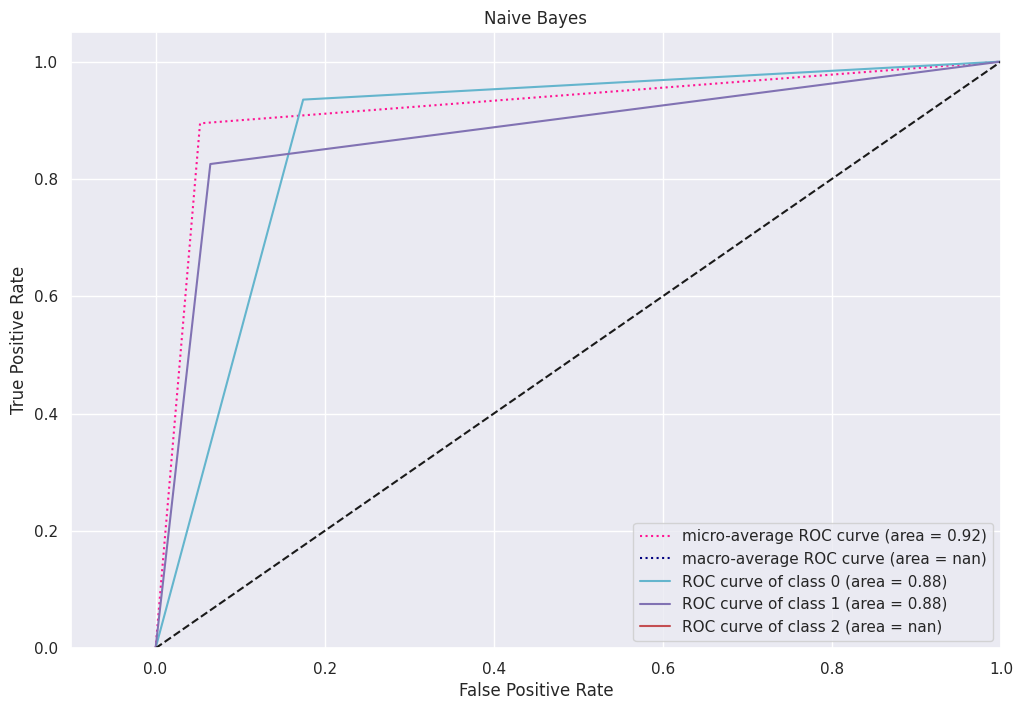

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


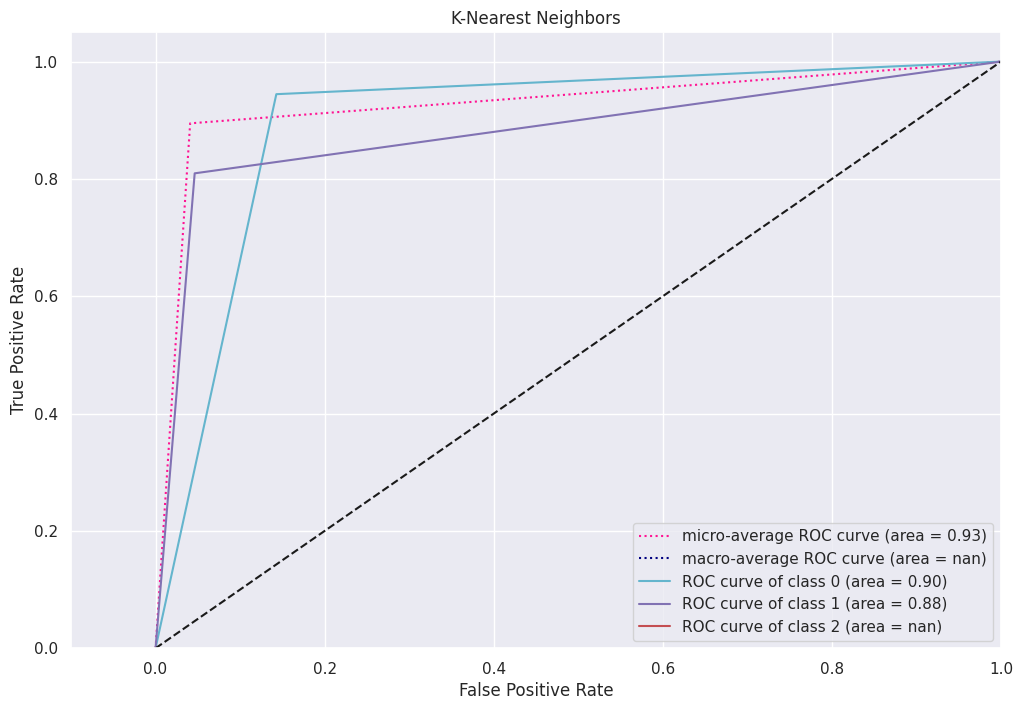

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


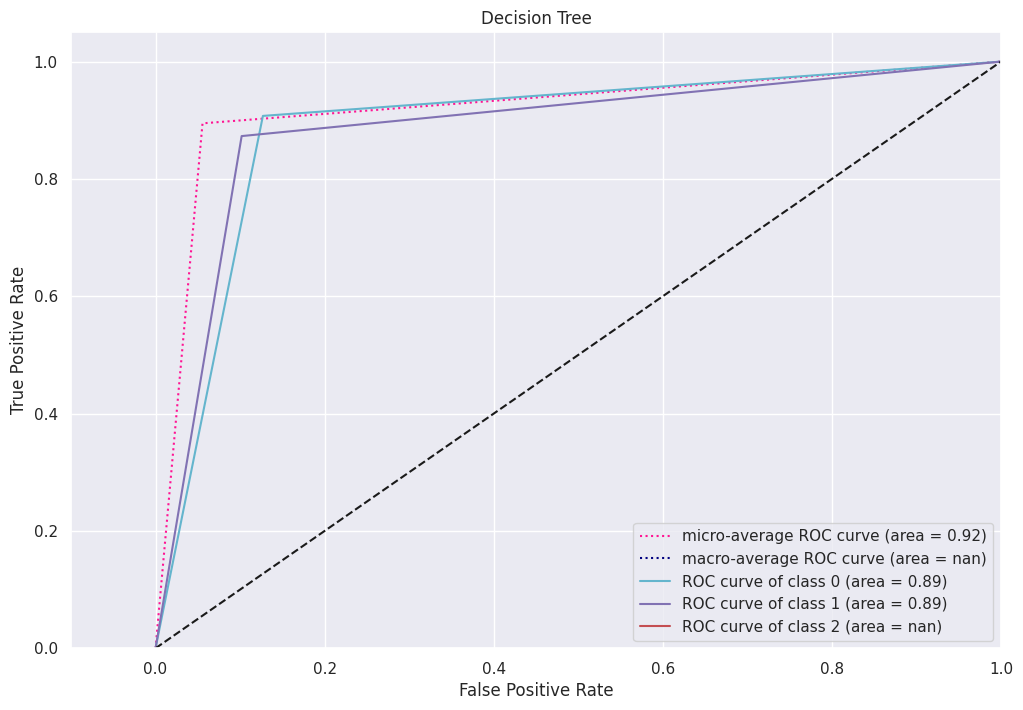

DATASET: Z12


/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


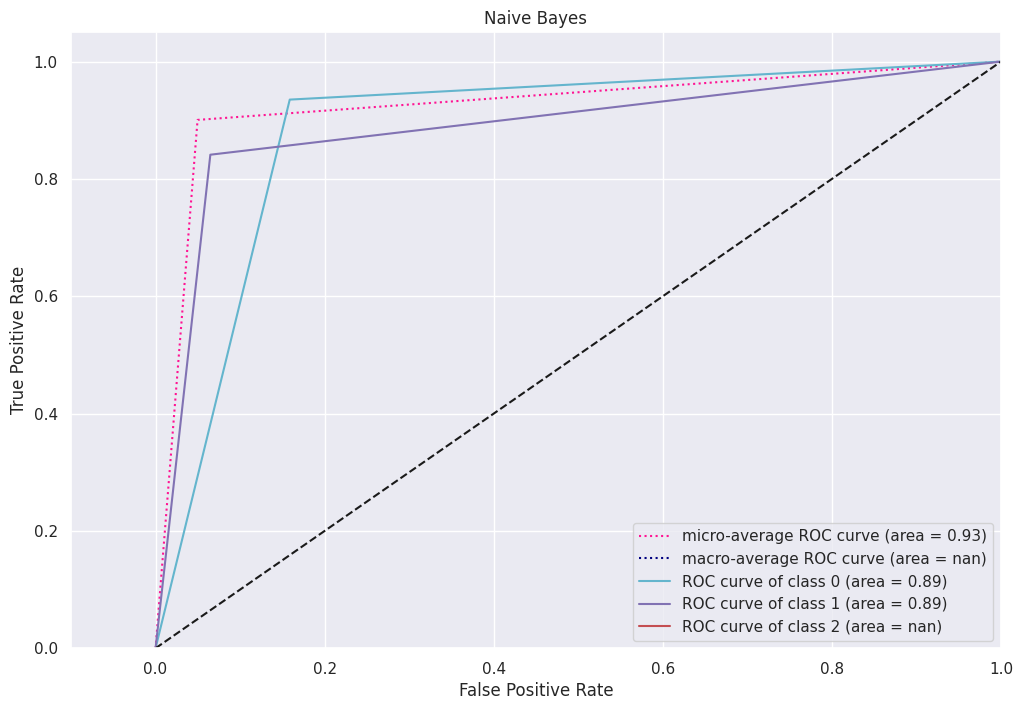

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


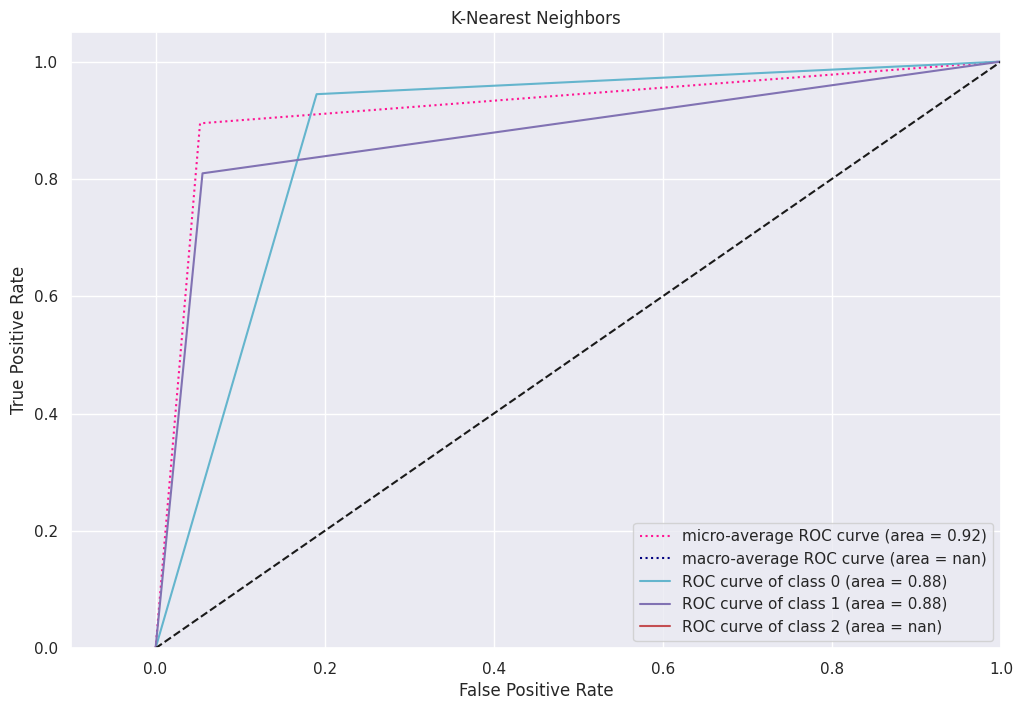

/usr/local/lib/python3.9/dist-packages/sklearn/multiclass.py:77: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


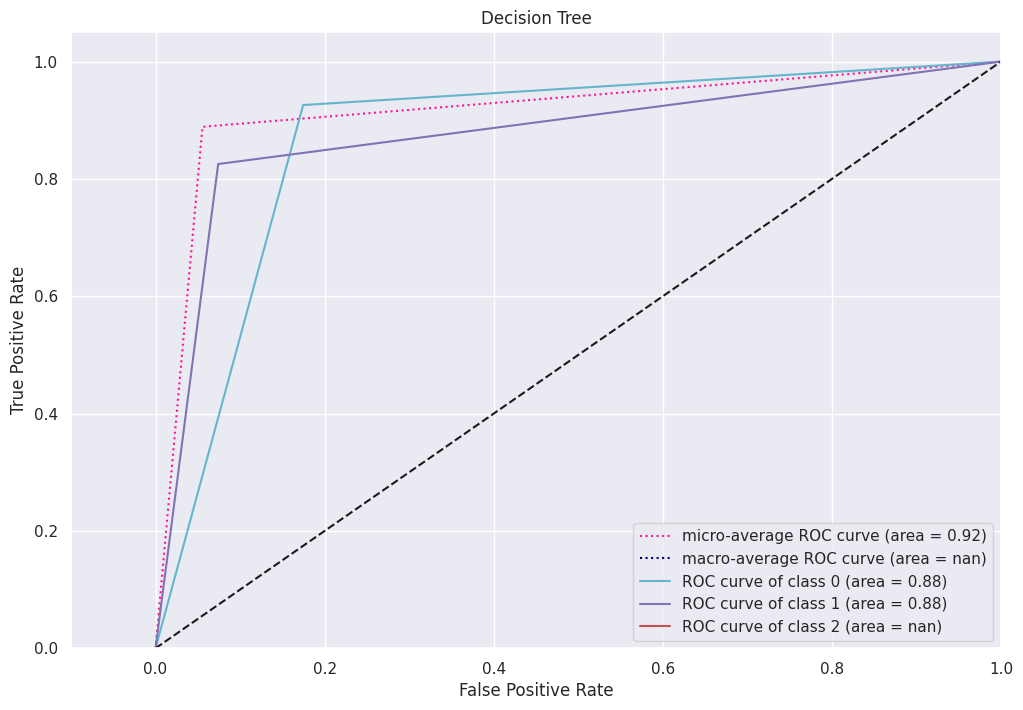

In [584]:
#ADAPTED FROM: https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

datasets = [('FULL DATA', X_train, y_train, X_test, y_test), ('Z', Z_train, zy_train, Z_test, zy_test), ('Z12', Z12_train, z12y_train, Z12_test, z12y_test)]
for i, (name, X_tr, y_tr, X_tst, y_tst) in enumerate(datasets):
  # Binarize the labels
  y_train = label_binarize(y_tr, classes=[0, 1, 2])
  y_test = label_binarize(y_tst, classes=[0, 1, 2])
  n_classes = y_train.shape[1]
  print(f'DATASET: {name}')

  list_algos = [gnb, knn, dt]
  algo_name = ['Naive Bayes', 'K-Nearest Neighbors', 'Decision Tree']
  for i, (algo, algo_name) in enumerate(zip(list_algos, algo_name)):
    classifier = OneVsRestClassifier(algo)
    y_pred = classifier.fit(X_tr, y_train).predict(X_tst)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i], drop_intermediate=False)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel(), drop_intermediate=False)
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    fig, ax = plt.subplots()

    plt.plot(fpr["micro"], tpr["micro"], label=f'micro-average ROC curve (area = {roc_auc["micro"]:0.2f})', color="deeppink", linestyle=':')
    plt.plot(fpr["macro"], tpr["macro"], label=f'macro-average ROC curve (area = {roc_auc["macro"]:0.2f})', color="navy", linestyle=':')

    colors = cycle(['c', 'm', 'r'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i],tpr[i], color=color,label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'{algo_name}')
    plt.legend()
    plt.show()

## **Bar Chart Plot**

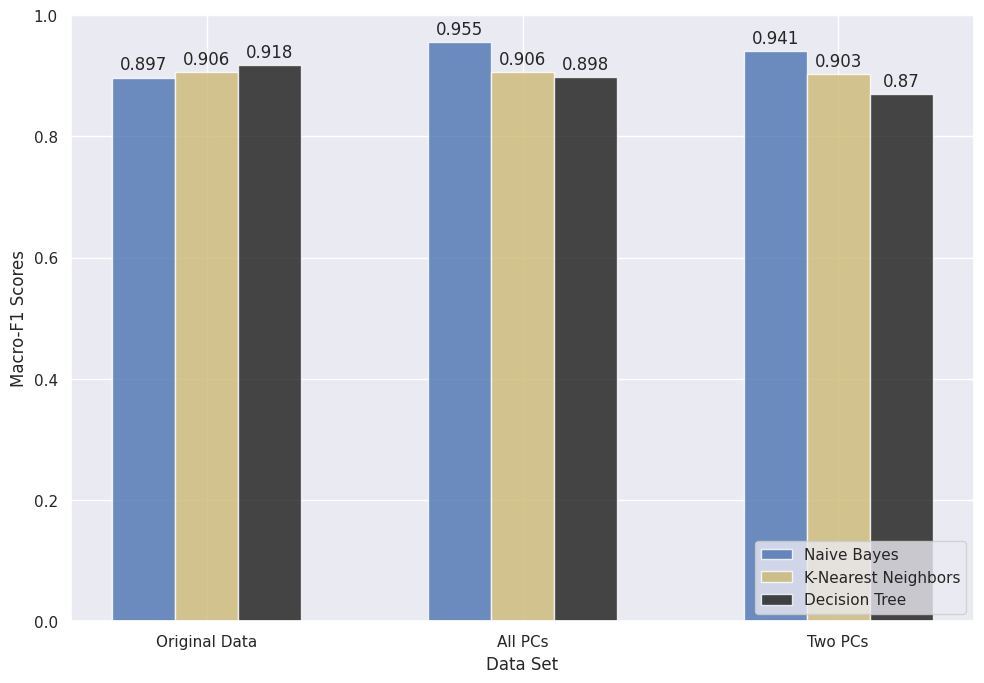

In [585]:
# ADAPTED FROM: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    for r in rects:
        height = r.get_height()
        ax.annotate(f'{height}', xy=(r.get_x() + r.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

n_groups = 3
ind = np.arange(n_groups)

# F1 Scores from above
NB = (0.897, 0.955, 0.941)
KNN = (0.906, 0.906, 0.903)
DT = (0.918, 0.898, 0.870)

# create plot
fig, ax = plt.subplots(figsize=(10,7))
index = np.arange(n_groups)
bar_width = 0.20
opacity = 0.8

rects1 = plt.bar(index, NB, bar_width, alpha=opacity, color='b', label='Naive Bayes')
rects2 = plt.bar(index + bar_width, KNN, bar_width, alpha=opacity, color='y', label='K-Nearest Neighbors')
rects3 = plt.bar(index + bar_width*2, DT, bar_width, alpha=opacity, color='k', label='Decision Tree')

ax.set_xlabel('Data Set')
ax.set_ylabel('Macro-F1 Scores')
#plt.title(f'')
plt.xticks(index + bar_width, ('Original Data', 'All PCs', 'Two PCs'))
plt.legend(loc="lower right")

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()